### Import librairies

In [160]:
# Main libraries
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager

# Libraries for vizualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Library for ignoring warnings
import warnings
warnings.filterwarnings("ignore")

### Define path for each dataset

In [161]:
# Define paths for each dataset
application_test_path = "C:/Users/33624/Projet+Mise+en+prod+-+home-credit-default-risk/application_test.csv"
application_train_path = "C:/Users/33624/Projet+Mise+en+prod+-+home-credit-default-risk/application_train.csv"
bureau_path = "C:/Users/33624/Projet+Mise+en+prod+-+home-credit-default-risk/bureau.csv"
bureau_balance_path = "C:/Users/33624/Projet+Mise+en+prod+-+home-credit-default-risk/bureau_balance.csv"
credit_card_balance_path = "C:/Users/33624/Projet+Mise+en+prod+-+home-credit-default-risk/credit_card_balance.csv"
HomeCredit_columns_description_path = "C:/Users/33624/Projet+Mise+en+prod+-+home-credit-default-risk/HomeCredit_columns_description.csv"
installments_payments_path = "C:/Users/33624/Projet+Mise+en+prod+-+home-credit-default-risk/installments_payments.csv"
POS_CASH_balance_path = "C:/Users/33624/Projet+Mise+en+prod+-+home-credit-default-risk/POS_CASH_balance.csv"
previous_application_path = "C:/Users/33624/Projet+Mise+en+prod+-+home-credit-default-risk/previous_application.csv"
sample_submission_path = "C:/Users/33624/Projet+Mise+en+prod+-+home-credit-default-risk/sample_submission.csv"

### Create function to set pandas display options

In [154]:
# Code to display all the columns
def set_pandas_display_options() -> None:
    display = pd.options.display
    display.max_columns = 130
    display.max_rows = 220
    display.max_colwidth = 200
    display.width = None
set_pandas_display_options()

### Create functions for matplotlib graphs

In [155]:
# Show exact values on barplots
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [156]:
# Create function that counts the observations in each categorical bin using bars
def graph_objects(dataframe, hue = None):
    
    if hue is not None:
        hue = hue
        
    df = dataframe.dtypes
    df.index.name = 'columns'
    df = pd.DataFrame(df, columns = ['dtype'])
    df = df.reset_index()
    df = df[df['dtype'] == 'object']
    list_objects = df['columns'].tolist()
    
    for obj in list_objects:
        plt.figure(figsize = (15,4))
        plot = sns.countplot(obj, data = dataframe, hue = hue)
        plt.xticks(rotation = 90)
        show_values(plot)

# Exploratory Data Analysis

## HomeCredit_columns_description_path
-> Observe definition of each feature in each dataset

In [4]:
# Load HomeCredit_columns_description dataset
HomeCredit_columns_description_df = pd.read_csv(HomeCredit_columns_description_path, 
                                                sep = ',',
                                                encoding = 'iso8859_1') # not working with utf-8 encoding
HomeCredit_columns_description_df

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


## Application_train and Application_test datasets

In [5]:
# Load application_train dataset
train_df = pd.read_csv(application_train_path, sep = ',')
train_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
# test dataset
test_df = pd.read_csv(application_test_path, sep = ',')
test_df

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Marr

In [7]:
# Shape of the datasets
print(f'Training dataset contains {train_df.shape[0]} records and {train_df.shape[1]} columns.')
print(f'Testing dataset contains {test_df.shape[0]} records and {test_df.shape[1]} columns.')

Training dataset contains 307511 records and 122 columns.
Testing dataset contains 48744 records and 121 columns.


-> Train and test datasets contain the same features except the 'TARGET' feature that is only present in Train

In [8]:
# Comparing size of train and test datasets
print('ratio train/test =', train_df.shape[0] / test_df.shape[0])
print('ratio test/train =', test_df.shape[0] / train_df.shape[0])

ratio train/test = 6.308694403413753
ratio test/train = 0.1585114028441259


-> Train/test split is approximatively 84/16

In [9]:
# Missing values in train
train_df.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [10]:
# Missing values in test
test_df.isna().sum()

SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        24
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                   911
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     32312
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

-> Features with missing values in test dataset have missing values too in train dataset

In [11]:
# all NaNs
print(f'Total training NaNs = {train_df.isnull().sum().sum()}')
print(f'Total Testing NaNs = {test_df.isnull().sum().sum()}')

Total training NaNs = 9152465
Total Testing NaNs = 1404419


In [12]:
# Checking if missing values ratio corresponds to size ratio fo the datasets
print('missing values ratio =', test_df.isnull().sum().sum() / train_df.isnull().sum().sum())

missing values ratio = 0.15344707682575132


-> Missing values ratio is approximatively the same than size ratio between train and test datasets

In [13]:
# Only columns with NaNs count and percentage in train dataset
columns = train_df.isnull().sum()[train_df.isnull().sum() != 0].keys()
nans_count = train_df.isnull().sum()[train_df.isnull().sum() != 0].values
nans_percentage = train_df.isnull().sum()[train_df.isnull().sum() != 0].values/train_df.shape[0]

# create a dataframe from the extracted info. 
nans_df = pd.DataFrame({'Column': columns, 'No. of NaNs': nans_count, '% of NaNs in Column':nans_percentage * 100})
nans_df = nans_df.sort_values(by = '% of NaNs in Column', ascending = False)
nans_df

,Column,No. of NaNs,% of NaNs in Column
41,COMMONAREA_MEDI,214865,69.872297
13,COMMONAREA_AVG,214865,69.872297
27,COMMONAREA_MODE,214865,69.872297
49,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
35,NONLIVINGAPARTMENTS_MODE,213514,69.432963
21,NONLIVINGAPARTMENTS_AVG,213514,69.432963
51,FONDKAPREMONT_MODE,210295,68.386172
33,LIVINGAPARTMENTS_MODE,210199,68.354953
47,LIVINGAPARTMENTS_MEDI,210199,68.354953
19,LIVINGAPARTMENTS_AVG,210199,68.354953


<AxesSubplot:>

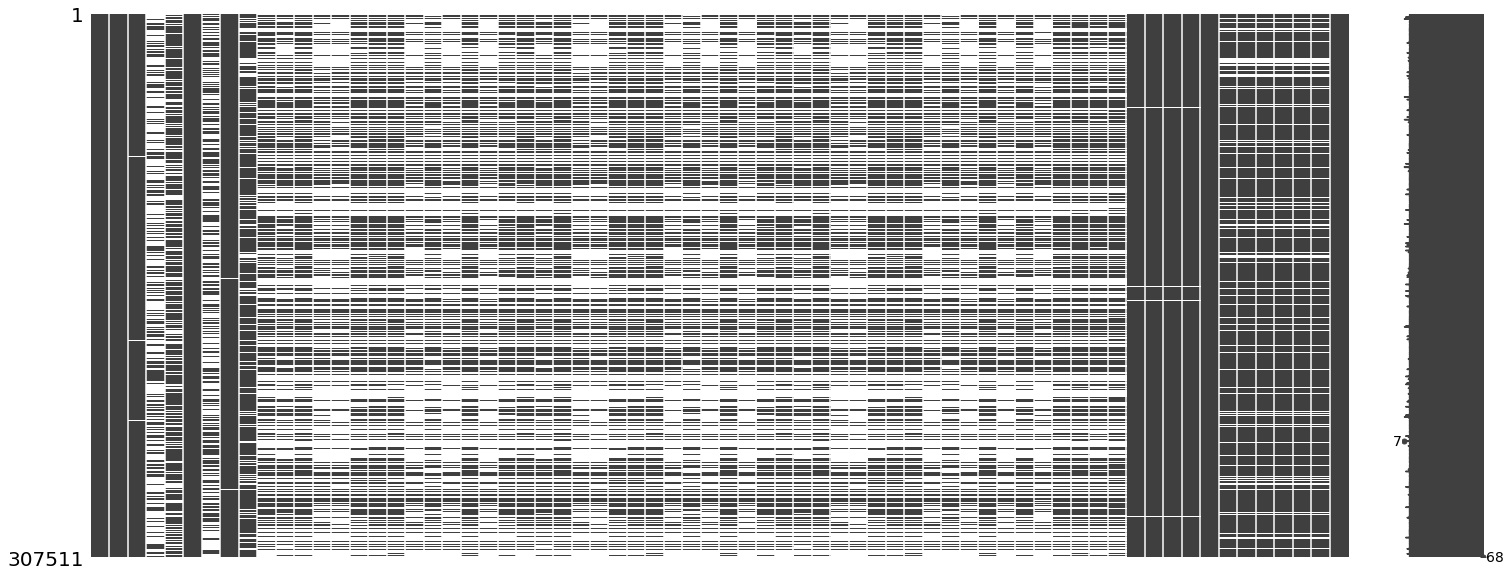

In [14]:
# visualize columns with NaNs distribution over target
msno.matrix(train_df[list(columns) + ['TARGET']].sort_values(by = 'TARGET'))

In [15]:
# sum of all duplicated records in train and test datasets
print('Number of duplicates in train dataset:', train_df.duplicated().sum())
print('Number of duplicates in test dataset:', test_df.duplicated().sum())

Number of duplicates in train dataset: 0
Number of duplicates in test dataset: 0


In [16]:
# Check 'TARGET' column in train dataset
print('Count of Each Class\n' + '-'*20)
print(train_df['TARGET'].value_counts())

Count of Each Class
--------------------
0    282686
1     24825
Name: TARGET, dtype: int64


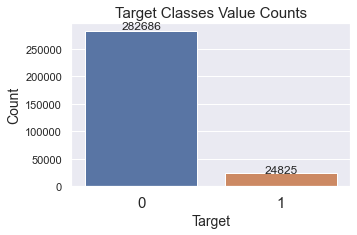

In [18]:
# visualize TARGET value counts
plt.figure(figsize = (5,3))

sns.set_theme(style = 'darkgrid')

g = sns.countplot(x = 'TARGET', data = train_df)

plt.title('Target Classes Value Counts', size = 15)
plt.xlabel('Target', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 15)

# showing exact values on bars
show_values(g);

In [19]:
# Calculate and print ercentage of each class
target0 = len(train_df.loc[train_df['TARGET'] == 0])
target1 = len(train_df.loc[train_df['TARGET'] == 1])
print('percentage of TARGET 0 =', target0 / (target0 + target1) * 100, '%')
print('percentage of TARGET 1 =', target1 / (target0 + target1) * 100, '%')

percentage of TARGET 0 = 91.92711805431351 %
percentage of TARGET 1 = 8.072881945686495 %


-> Most of clients can repay their loans (TARGET 0)  
-> Data set in imbalanced : 91.9/8.1

In [20]:
# all columns dtypes
train_df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [21]:
# go deeper with object columns and extract the unique classes in each column
## create a dataframe with object dtype columns
unique_df = pd.DataFrame(train_df.select_dtypes('object').nunique()).reset_index()
unique_df.columns = ['Column','No. of Unique Values']

## extract the unique classes in each column
unique_df['Unique Values'] = unique_df['Column'].apply(lambda x: train_df[x].unique())
unique_df.sort_values(by='No. of Unique Values')

,Column,No. of Unique Values,Unique Values
0,NAME_CONTRACT_TYPE,2,"[Cash loans, Revolving loans]"
2,FLAG_OWN_CAR,2,"[N, Y]"
3,FLAG_OWN_REALTY,2,"[Y, N]"
15,EMERGENCYSTATE_MODE,2,"[No, nan, Yes]"
1,CODE_GENDER,3,"[M, F, XNA]"
13,HOUSETYPE_MODE,3,"[block of flats, nan, terraced house, specific housing]"
12,FONDKAPREMONT_MODE,4,"[reg oper account, nan, org spec account, reg oper spec account, not specified]"
6,NAME_EDUCATION_TYPE,5,"[Secondary / secondary special, Higher education, Incomplete higher, Lower secondary, Academic degree]"
7,NAME_FAMILY_STATUS,6,"[Single / not married, Married, Civil marriage, Widow, Separated, Unknown]"
8,NAME_HOUSING_TYPE,6,"[House / apartment, Rented apartment, With parents, Municipal apartment, Office apartment, Co-op apartment]"


-> Categorical features will be encoded with one_hoy_encoder function

In [22]:
# check CODE_GENDER column in training and testing datasets
print('Train Dataset')
print(train_df['CODE_GENDER'].value_counts())

print('\nTest Dataset')
print(test_df['CODE_GENDER'].value_counts())

Train Dataset
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Test Dataset
F    32678
M    16066
Name: CODE_GENDER, dtype: int64


-> CODE_GENDER = XNA of train_dataset will be dropped as there is not XNA in test_dataset

In [23]:
# Top 10 Columns with Positive Correlation with our TARGET 
print('Top 10 Columns with Positive Correlation with TARGET\n', '-'*50)
print(train_df.corr()['TARGET'].sort_values().tail(10))

# Negative ones
print('\nTop 10 Columns with Negative Correlation with TARGET\n', '-'*50)
print(train_df.corr()['TARGET'].sort_values().head(10))

Top 10 Columns with Positive Correlation with TARGET
 --------------------------------------------------
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Top 10 Columns with Negative Correlation with TARGET
 --------------------------------------------------
EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS

-> Feature with best positive correlations with TARGET is  

    - DAYS_BIRTH : age of client
    
-> Features with best negative correlations with TARGET are    

    - EXT_SOURCE_3, EXT_SOURCE_2, EXT_SOURCE_1 : Normalized scores from external data source

In [24]:
# Detect outliers from continuous columns

# extract continuous columns
all_numerical_cols = list(train_df.select_dtypes(exclude='object').columns)

# continuous columns are all columns excluding target and flags columns
cont_cols = [col for col in all_numerical_cols if col!="TARGET" and col[:5]!='FLAG_']
print(f'No. of continuous features = {len(cont_cols)}')

No. of continuous features = 79


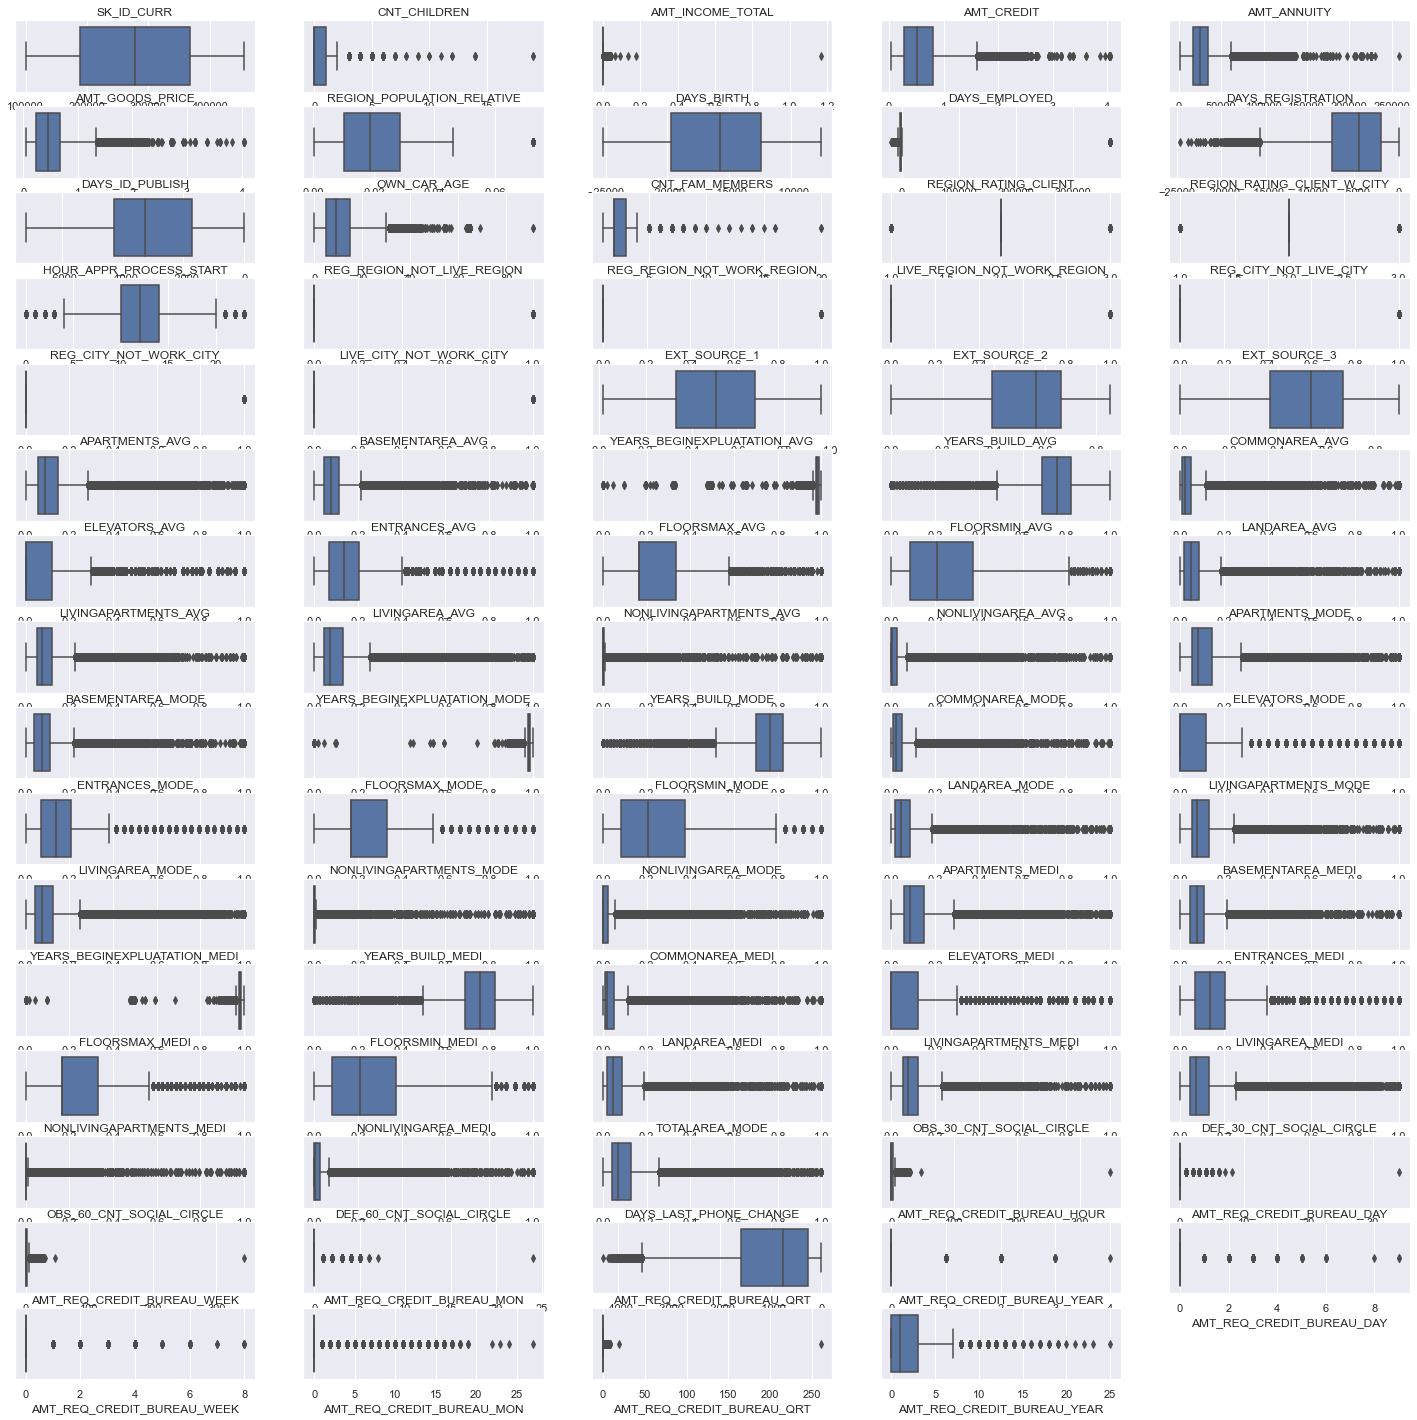

In [25]:
# draw boxplots for each continuous column
plt.figure(figsize=(25, 25))
for i, col in enumerate(cont_cols):
    plt.subplot(16, 5, i+1)
    sns.boxplot(data=train_df, x=col)
    plt.title(col)

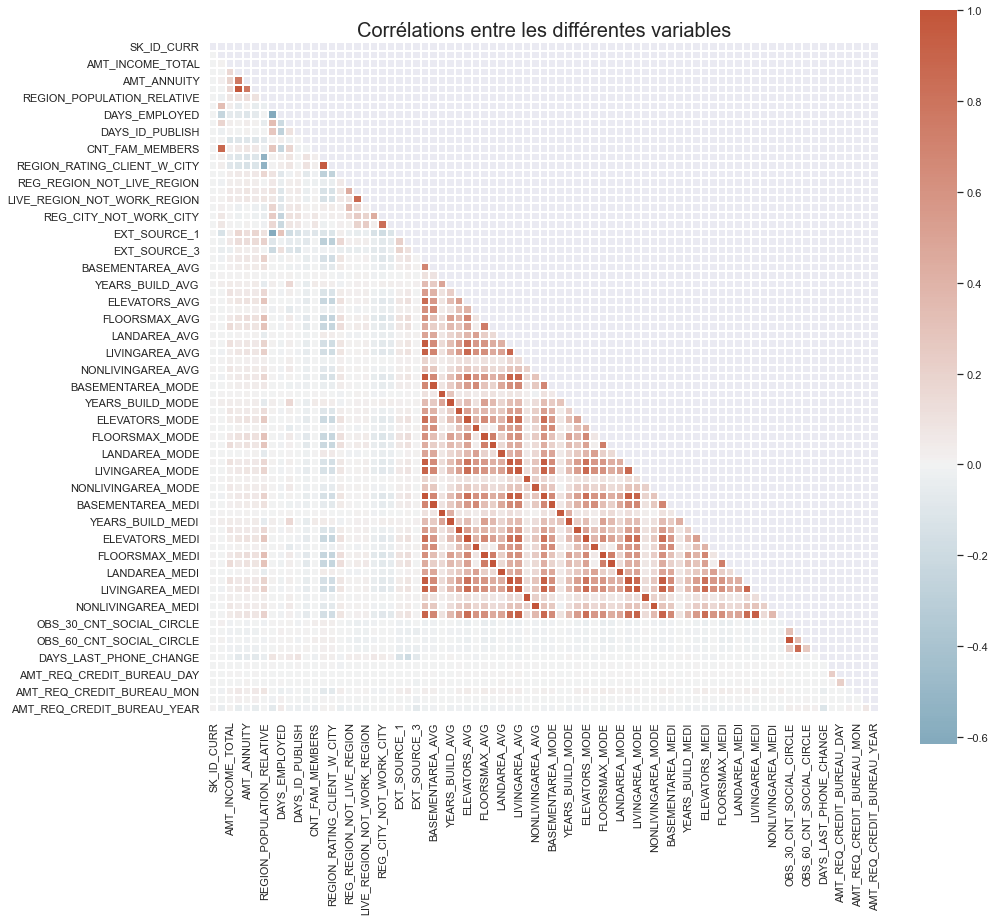

In [26]:
# compute the correlation matrix
corr = train_df[cont_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
colormap = sns.heatmap(corr, 
                       annot=False, 
                       mask=mask, 
                       cmap=cmap, 
                       vmax=1, 
                       center=0,
                       square=True, 
                       linewidths=2, 
                       cbar_kws={"shrink": .9})

plt.title('Corrélations entre les différentes variables', size = 20);

-> A lot of features are highly positively correlated (dark brown)

In [27]:
# let's go deeper in these columns
## show only 20 columns at a time
for i in np.linspace(0,60,4, dtype=int):
    if i == 60:
        display(train_df[cont_cols[i:78]].describe())
    else:
        display(train_df[cont_cols[i:i+20]].describe())

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173
std,102790.175348,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,5.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,9.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000
75%,367142.500000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,15.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000
max,456255.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,91.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000


,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE
count,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000
mean,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231
std,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,0.161380,0.081184,0.092576,0.110565,0.047732,0.069523,0.107936
min,0.000000,0.000000,0.014568,8.173617e-08,0.000527,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.334007,3.924574e-01,0.370650,0.05770,0.044200,0.976700,0.687200,0.007800,0.000000,0.069000,0.166700,0.083300,0.018700,0.050400,0.045300,0.000000,0.000000,0.052500
50%,0.000000,0.000000,0.505998,5.659614e-01,0.535276,0.08760,0.076300,0.981600,0.755200,0.021100,0.000000,0.137900,0.166700,0.208300,0.048100,0.075600,0.074500,0.000000,0.003600,0.084000
75%,0.000000,0.000000,0.675053,6.636171e-01,0.669057,0.14850,0.112200,0.986600,0.823200,0.051500,0.120000,0.206900,0.333300,0.375000,0.085600,0.121000,0.129900,0.003900,0.027700,0.143900
max,1.000000,1.000000,0.962693,8.549997e-01,0.896010,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI
count,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000
mean,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213
std,0.084307,0.064575,0.110111,0.074445,0.132256,0.100977,0.143709,0.161160,0.081750,0.097880,0.111845,0.046276,0.070254,0.109076,0.082179,0.059897,0.112066,0.076144,0.134467,0.100368
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040700,0.976700,0.699400,0.007200,0.000000,0.069000,0.166700,0.083300,0.016600,0.054200,0.042700,0.000000,0.000000,0.058300,0.043700,0.976700,0.691400,0.007900,0.000000,0.069000
50%,0.074600,0.981600,0.764800,0.019000,0.000000,0.137900,0.166700,0.208300,0.045800,0.077100,0.073100,0.000000,0.001100,0.086400,0.075800,0.981600,0.758500,0.020800,0.000000,0.137900
75%,0.112400,0.986600,0.823600,0.049000,0.120800,0.206900,0.333300,0.375000,0.084100,0.131300,0.125200,0.003900,0.023100,0.148900,0.111600,0.986600,0.825600,0.051300,0.120000,0.206900
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT
count,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474
std,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166700,0.083300,0.018700,0.051300,0.045700,0.000000,0.000000,0.041200,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.166700,0.208300,0.048700,0.076100,0.074900,0.000000,0.003100,0.068800,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.333300,0.375000,0.086800,0.123100,0.130300,0.003900,0.026600,0.127600,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000


- Suspicious data:  
    -> The maximum value in days employed is positive not negative, a typo!  
       + it's about 1000 years, how come! + the minimum value is about 49 years! client work in the same job for 49 years! 
- As shown almost all continous features have outliers, so we will either standardize these features if we use models sensitive to the outliers like Logestic Regression Model or use models that is not sensitive, less impacted and robust to outliers like Tree-Based Models or deep neural network.

- Features with suspicious data will be analyzed well to clean the wrong data.

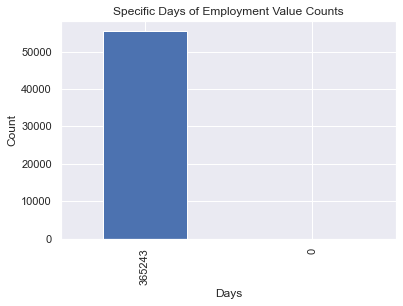

In [28]:
# 1 - The maximum value in days employed is positive not negative + it's about 1000 years

## visualize the clients days of employment >=0
train_df[train_df['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts().plot(kind='bar');
plt.title('Specific Days of Employment Value Counts')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

In [29]:
# the percentage of this value in our dataset
value_perctage = len(train_df[train_df['DAYS_EMPLOYED']==365243])/len(train_df) * 100
print('Records with this value represent {:.2f}% of all data.'.format(value_perctage))

Records with this value represent 18.01% of all data.


->  18% of train dataset with this value : it may be an error and it must be replaced with NaN, mean or median value.

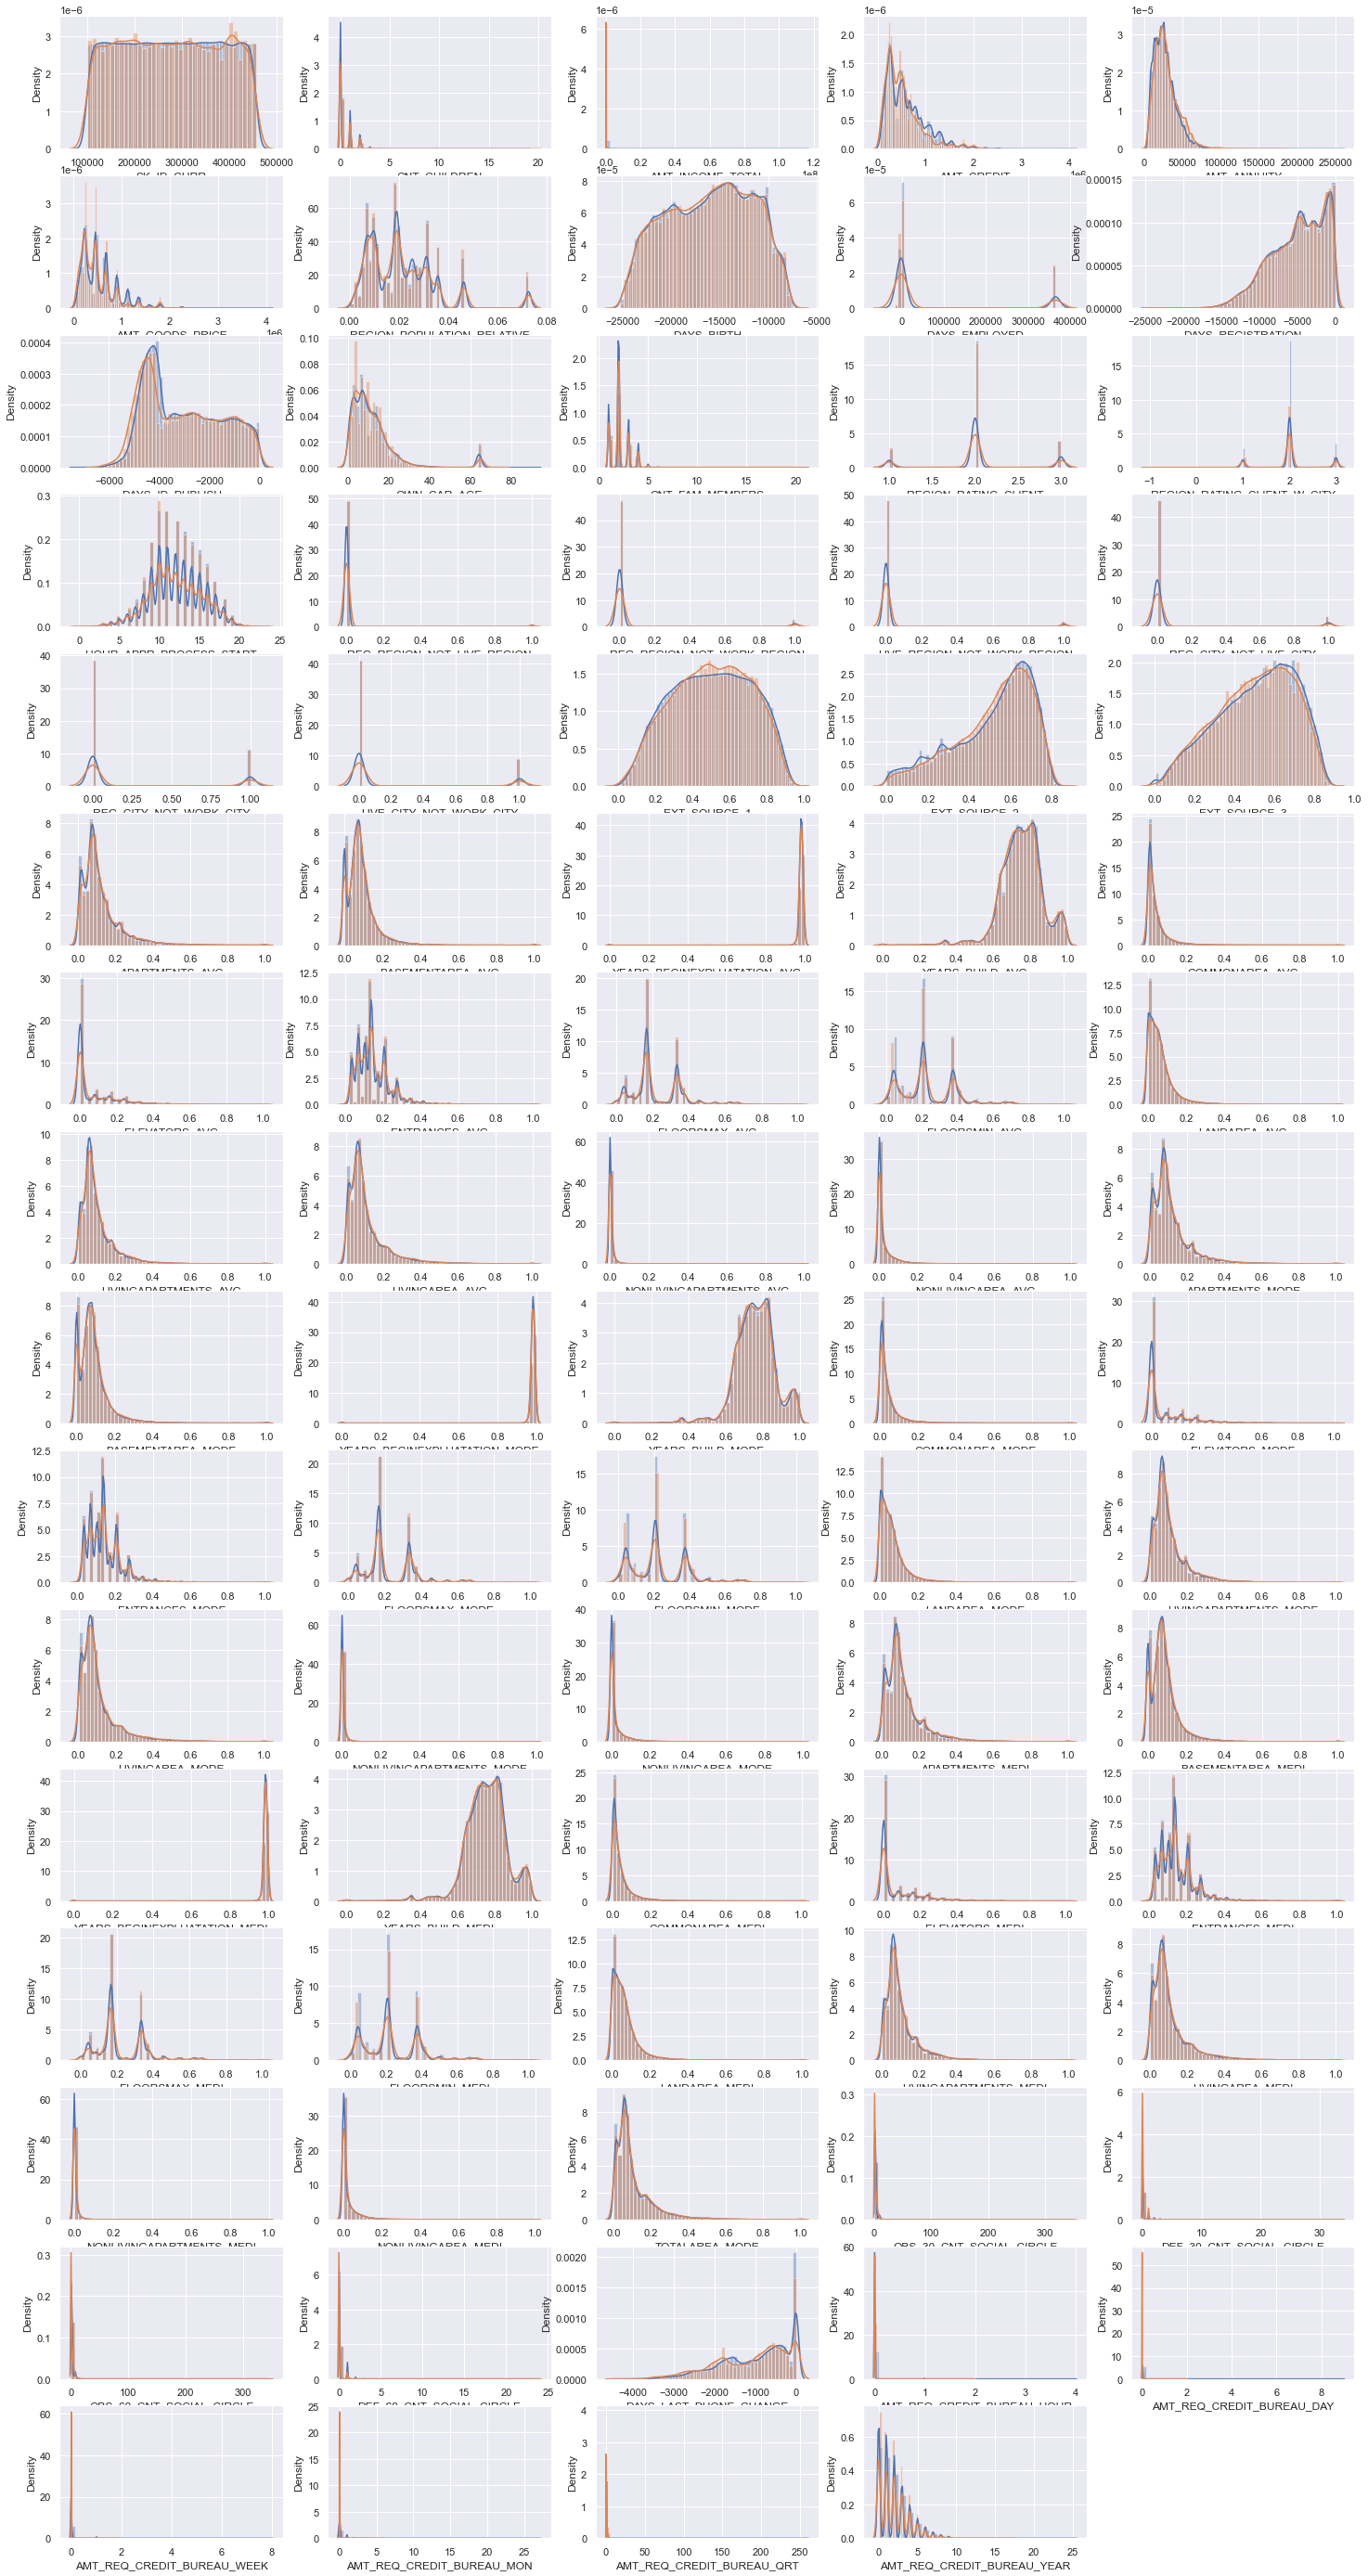

In [30]:
# Compare distribution of each continuous feature from train and test datasets
# create a distribution plot for each continuous feature
plt.figure(figsize = (25, 50))
for i, col in enumerate(cont_cols):
    plt.subplot(16, 5, i + 1)
    sns.distplot(train_df[col])
    sns.distplot(test_df[col])

-> Train and test dataset have the same distributions: the trained model will mostly generalize and predict well.

### Insights

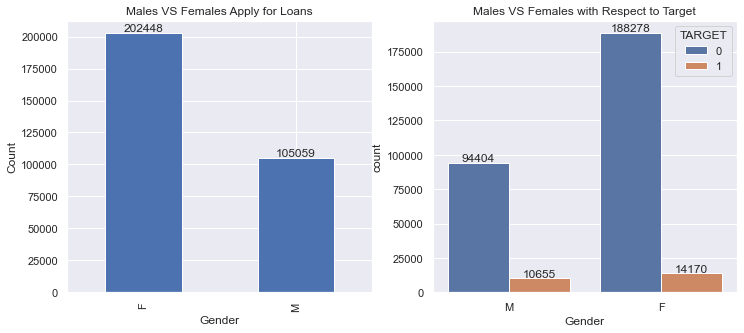

In [31]:
# Which gender applys more for loans?
# Is there relation between the gender and the ability to repay?

plt.figure(figsize = (12,5))
plt.subplot(1, 2, 1)
g1 = train_df[train_df['CODE_GENDER'] != 'XNA']['CODE_GENDER'].value_counts().plot(kind = 'bar', 
                                                                                 title = 'Males VS Females Apply for Loans');
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
g2 = sns.countplot(data=train_df[train_df['CODE_GENDER'] != 'XNA'], x = 'CODE_GENDER', hue = 'TARGET');
plt.title('Males VS Females with Respect to Target')
plt.xlabel('Gender')

# showing exact values on bars
show_values(g1)
show_values(g2)
plt.show()

-> Females apply for loans more than Males  
-> Gender does not affect the Target

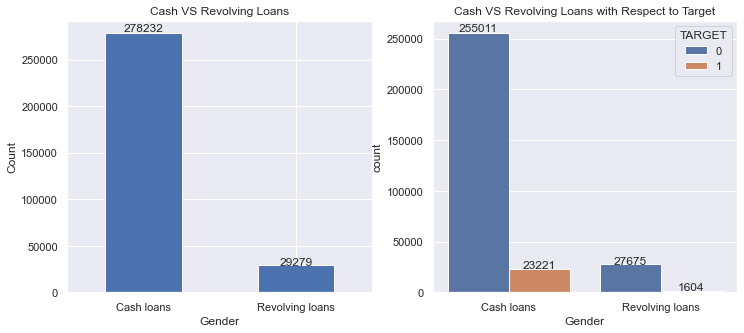

In [32]:
# Which type of loan contract clients applys more for?

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
g1 = train_df['NAME_CONTRACT_TYPE'].value_counts().plot(kind = 'bar', title = 'Cash VS Revolving Loans');
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
g2 = sns.countplot(data = train_df, x = 'NAME_CONTRACT_TYPE', hue = 'TARGET')
plt.title('Cash VS Revolving Loans with Respect to Target')
plt.xlabel('Gender')

# showing exact values on bars
show_values(g1)
show_values(g2)
plt.show()

-> Most clients tend to take cash loans rather than revolving loans

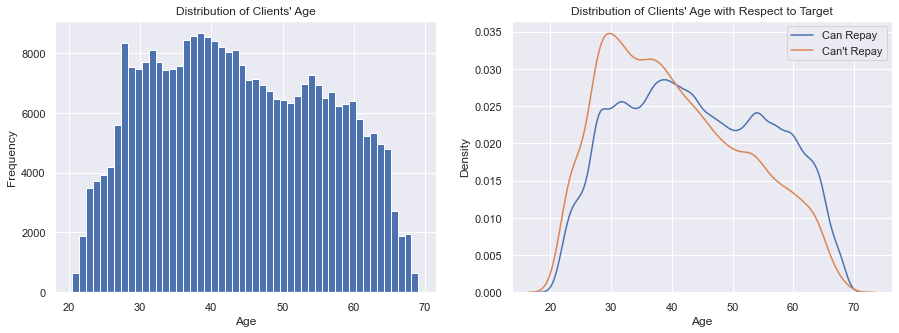

In [33]:
# Is there relation between the age and the ability to repay?

# Plot the distribution of clients' Age
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
(train_df['DAYS_BIRTH']/-365.25).plot(kind = 'hist', bins = 50, title = 'Distribution of Clients\' Age');
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plot the distribution of clients' Age when they can repay or not their loan
plt.subplot(1, 2, 2)
proper_day_birth_df = train_df[['DAYS_BIRTH', 'TARGET']]
proper_day_birth_df['DAYS_BIRTH'] = proper_day_birth_df['DAYS_BIRTH']/-365.25
# Clients who can repay their loan
sns.distplot(proper_day_birth_df[proper_day_birth_df['TARGET'] == 0]['DAYS_BIRTH'], 
             hist = False, 
             label = 'Can Repay');
# Clients who can not repay their loan
sns.distplot(proper_day_birth_df[proper_day_birth_df['TARGET'] == 1]['DAYS_BIRTH'], 
             hist = False, 
             label = 'Can\'t Repay');
plt.title('Distribution of Clients\' Age with Respect to Target')
plt.xlabel('Age')
plt.legend();
plt.show()

-> Clients aged about 30 years are more likely to have difficulties with repay, where those aged about 40 can repay well.

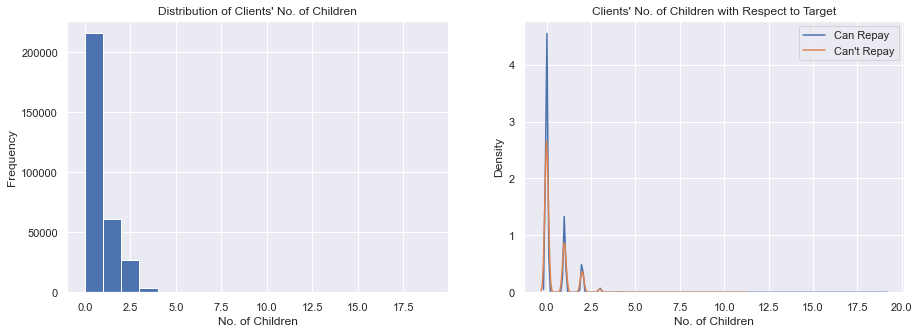

In [34]:
# Does the client's No. of children affect the ability to repay?

# Plot the distribution of the clients' number of children
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
train_df['CNT_CHILDREN'].plot(kind = 'hist', 
                              bins = 19, 
                              title = 'Distribution of Clients\' No. of Children');
plt.xlabel('No. of Children')
plt.ylabel('Frequency')

# Plot the distribution of clients' number of children when they can repay or not their loan
plt.subplot(1, 2, 2)
# Clients who can repay their loan
sns.distplot(train_df[train_df['TARGET'] == 0]['CNT_CHILDREN'], 
             hist = False, 
             label = 'Can Repay');
# Clients who can not repay their loan
sns.distplot(train_df[train_df['TARGET'] == 1]['CNT_CHILDREN'], 
             hist = False, 
             label = 'Can\'t Repay');
plt.title('Clients\' No. of Children with Respect to Target')
plt.xlabel('No. of Children')
plt.legend()
plt.show()

-> Client's without any children applys for loans more than others, and with increasing No. of children, client's don't tend to loan.

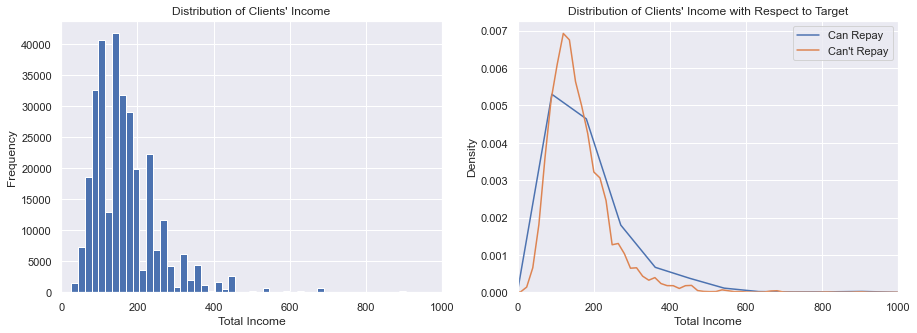

In [35]:
# Is there a relation between client income ant the amount of loan apply for?
# Does income and credit affect in the ability to repay?

# Distribution of the clients' income (k$)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
# Remove income outlier
proper_income_df = train_df.loc[train_df['AMT_INCOME_TOTAL'] != 117000000.0]
proper_income_df['AMT_INCOME_TOTAL'] = proper_income_df['AMT_INCOME_TOTAL'] / 1000
proper_income_df['AMT_INCOME_TOTAL'].plot(kind = 'hist', 
                                          bins = 1000, 
                                          title = 'Distribution of Clients\' Income');
plt.xlabel('Total Income')
plt.xlim([0,1000])

# Distribution of the clients' income (k$) when they can repay their loan
plt.subplot(1, 2, 2)
# Clients who can repay their loan
sns.distplot(proper_income_df[proper_income_df['TARGET'] == 0]['AMT_INCOME_TOTAL'], 
             hist = False, 
             bins = 1000, 
             label = 'Can Repay');
# Clients who can not repay their loan
sns.distplot(proper_income_df[proper_income_df['TARGET'] == 1]['AMT_INCOME_TOTAL'], 
             hist = False, 
             bins = 1000, 
             label = 'Can\'t Repay');
plt.title('Distribution of Clients\' Income with Respect to Target')
plt.xlabel('Total Income')
plt.xlim([0,1000])
plt.legend();
plt.show()

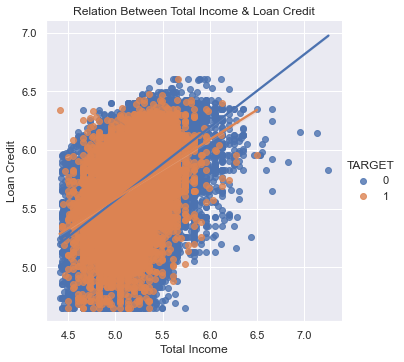

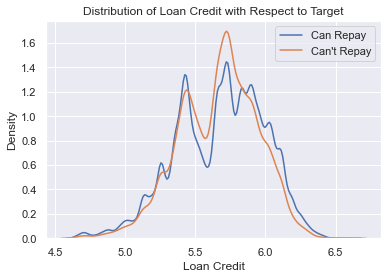

In [36]:
# let's normalize to see the plot properly
proper_income_df['log_AMT_INCOME_TOTAL'] = np.log10(proper_income_df['AMT_INCOME_TOTAL']*1000)
proper_income_df['log_AMT_CREDIT'] = np.log10(proper_income_df['AMT_CREDIT'])

# plot the relation between total income (log10) and Loan credit (log10)
sns.lmplot(x = 'log_AMT_INCOME_TOTAL', 
           y = 'log_AMT_CREDIT', 
           data = proper_income_df, 
           hue = 'TARGET');
plt.title('Relation Between Total Income & Loan Credit')
plt.xlabel('Total Income')
plt.ylabel('Loan Credit')
plt.show()

# Plot the distribution of Loan Credit when client can repay their loan or not
sns.distplot(proper_income_df[proper_income_df['TARGET'] == 0]['log_AMT_CREDIT'], 
             hist = False, 
             label = 'Can Repay');
sns.distplot(proper_income_df[proper_income_df['TARGET'] == 1]['log_AMT_CREDIT'], 
             hist = False, 
             label = 'Can\'t Repay');
plt.title('Distribution of Loan Credit with Respect to Target');
plt.xlabel('Loan Credit')
plt.legend();
plt.show()

-> Clients with low income tends to apply for loans more than others with high income.  
-> The higher client's income is, the larger loan amount apply for.  
-> Clients with income more than 3M tends always to repay, so this feature may help in our target.  
-> Clients with income between 10 and 18 are less likely to repay, vice versa.

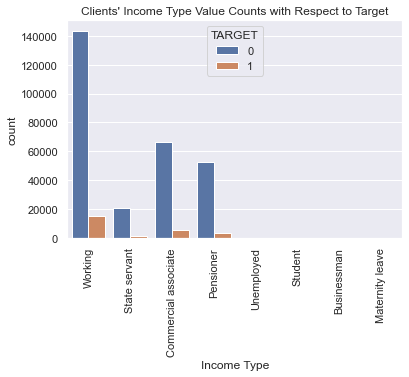

NAME_INCOME_TYPE      TARGET
Businessman           0             10
Commercial associate  0          66257
                      1           5360
Maternity leave       0              3
                      1              2
Pensioner             0          52380
                      1           2982
State servant         0          20454
                      1           1249
Student               0             18
Unemployed            0             14
                      1              8
Working               0         143550
                      1          15224
Name: TARGET, dtype: int64

In [37]:
# what's most income type of clients?

ax = sns.countplot(data = train_df, 
                   x = 'NAME_INCOME_TYPE', 
                   hue = 'TARGET');
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation = 90);
plt.title('Clients\' Income Type Value Counts with Respect to Target')
plt.xlabel('Income Type')
plt.show()

print('\n'*2)
train_df.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts()

-> Working clients are more willing to apply for loans more than others.  
-> a few businessmen and students apply for loans, but they always repay.  

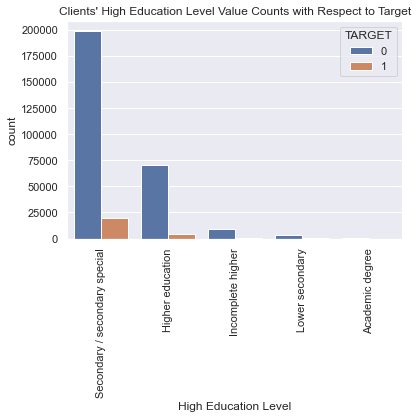

NAME_EDUCATION_TYPE            TARGET
Academic degree                0            161
                               1              3
Higher education               0          70854
                               1           4009
Incomplete higher              0           9405
                               1            872
Lower secondary                0           3399
                               1            417
Secondary / secondary special  0         198867
                               1          19524
Name: TARGET, dtype: int64

In [38]:
# what's most high education degree for clients?

ax = sns.countplot(data = train_df, 
                   x = 'NAME_EDUCATION_TYPE', 
                   hue = 'TARGET');
ax.set_xticklabels(ax.get_xticklabels(), 
                   rotation = 90);
plt.title('Clients\' High Education Level Value Counts with Respect to Target')
plt.xlabel('High Education Level')
plt.show()

print('\n'*2)
train_df.groupby('NAME_EDUCATION_TYPE')['TARGET'].value_counts()

-> Clients with Secondary high education level are more willing to apply for loans more than others.  
-> Almost 98% of clients with Academic degree high education level can repay their loans.

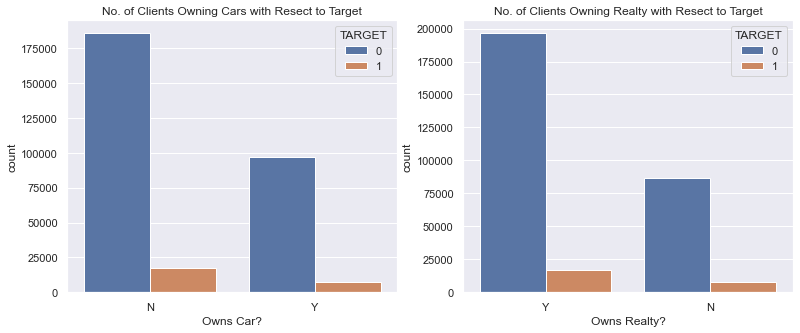

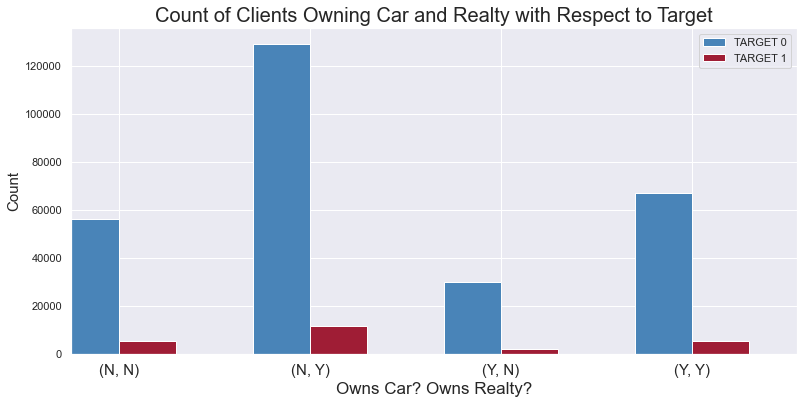

In [39]:
# Is this relation between owning car or realty on applying for loans or repay ability?

# Plot the number of clients owning cars when they can or can not repay their loan
plt.figure(figsize = (13,5))
plt.subplot(1, 2, 1)
sns.countplot(data = train_df, x = 'FLAG_OWN_CAR', hue = 'TARGET')
plt.title('No. of Clients Owning Cars with Resect to Target')
plt.xlabel('Owns Car?')

# Plot the number of clients owning realty when they can or can not repay their loan
plt.subplot(1, 2, 2)
sns.countplot(data = train_df, x = 'FLAG_OWN_REALTY', hue = 'TARGET')
plt.title('No. of Clients Owning Realty with Resect to Target')
plt.xlabel('Owns Realty?')
plt.show();

# Plot the number of clients owning cars and/or realty when they can or can not repay their loan
plt.figure(figsize = (13,6))
train_df[train_df['TARGET'] == 0].groupby(['FLAG_OWN_CAR', 
                                           'FLAG_OWN_REALTY']).count()['TARGET'].plot(kind = 'bar',
                                                                                      color = '#4984B8',
                                                                                      width = 0.3,
                                                                                      position = 1,
                                                                                      label = 'TARGET 0')
train_df[train_df['TARGET'] == 1].groupby(['FLAG_OWN_CAR', 
                                           'FLAG_OWN_REALTY']).count()['TARGET'].plot(kind = 'bar', 
                                                                                      color = '#9F1D35', 
                                                                                      width = 0.3,  
                                                                                      position = 0, 
                                                                                      label = 'TARGET 1')
plt.title('Count of Clients Owning Car and Realty with Respect to Target',
         size = 20);
plt.ylabel('Count', size = 15)
plt.xlabel('Owns Car? Owns Realty?', size = 17)
plt.xticks(rotation = 0, size = 15)
plt.legend()
plt.show()

-> Clients who doesn't own car but owns realty tend to apply for loans more than others, vice versa.

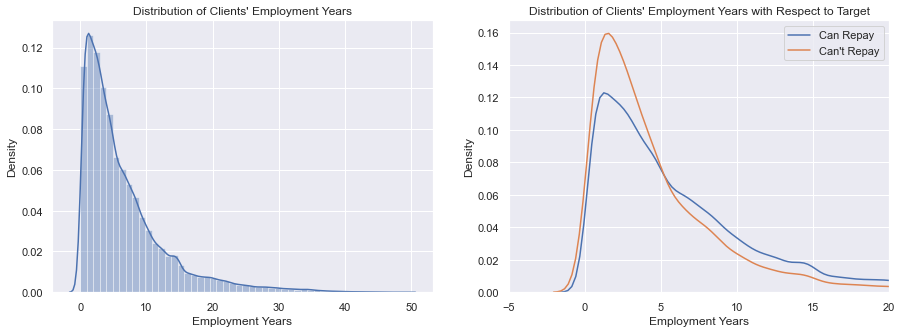

In [40]:
# Is there a relation between employment year and the ability to repay

# Remove uncorrect data
proper_days_empolyed_df = train_df[train_df['DAYS_EMPLOYED']!=365243]
proper_days_empolyed_df['YEARS_EMPLOYED'] = proper_days_empolyed_df['DAYS_EMPLOYED']/-365.25

# Plot the distribution of client's employment years
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(proper_days_empolyed_df['YEARS_EMPLOYED'])
plt.title('Distribution of Clients\' Employment Years')
plt.xlabel('Employment Years')

# Plot the distribution of client's employment years when they can or can not repay their loan 
plt.subplot(1, 2, 2)
# Clients who can repay their loan
sns.distplot(proper_days_empolyed_df[proper_days_empolyed_df['TARGET'] == 0]['YEARS_EMPLOYED'], 
             hist = False, 
             label = 'Can Repay');
# Clients who can repay their loan
sns.distplot(proper_days_empolyed_df[proper_days_empolyed_df['TARGET'] == 1]['YEARS_EMPLOYED'], 
             hist = False, 
             label = 'Can\'t Repay');
plt.title('Distribution of Clients\' Employment Years with Respect to Target');
plt.xlim([-5,20])
plt.xlabel('Employment Years')
plt.legend();

-> Clients with employment years less than 5 years tend to apply for loans more than others, and they are less likely to repay, especially less than 2 years, vice versa.

## Bureau dataset

In [41]:
# Load bureau dataset
bureau_df = pd.read_csv(bureau_path, sep = ',')
bureau_df

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [42]:
# Shape of bureau_df
bureau_df.shape

(1716428, 17)

In [43]:
# sum of all duplicated records in bureau_df dataset
print('Number of duplicates in bureau_df dataset:', bureau_df.duplicated().sum())

Number of duplicates in bureau_df dataset: 0


In [44]:
bureau_df.dtypes

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object

In [45]:
# Missing values in bureau_df
bureau_df.isna().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [46]:
# Missing values in bureau_df
bureau_df.isna().mean()

SK_ID_CURR                0.000000
SK_ID_BUREAU              0.000000
CREDIT_ACTIVE             0.000000
CREDIT_CURRENCY           0.000000
DAYS_CREDIT               0.000000
CREDIT_DAY_OVERDUE        0.000000
DAYS_CREDIT_ENDDATE       0.061496
DAYS_ENDDATE_FACT         0.369170
AMT_CREDIT_MAX_OVERDUE    0.655133
CNT_CREDIT_PROLONG        0.000000
AMT_CREDIT_SUM            0.000008
AMT_CREDIT_SUM_DEBT       0.150119
AMT_CREDIT_SUM_LIMIT      0.344774
AMT_CREDIT_SUM_OVERDUE    0.000000
CREDIT_TYPE               0.000000
DAYS_CREDIT_UPDATE        0.000000
AMT_ANNUITY               0.714735
dtype: float64

In [47]:
# Only columns with NaNs count and percentage in bureau_df dataset
columns = bureau_df.isnull().sum()[bureau_df.isnull().sum() != 0].keys()
nans_count = bureau_df.isnull().sum()[bureau_df.isnull().sum() != 0].values
nans_percentage = bureau_df.isnull().sum()[bureau_df.isnull().sum() != 0].values/bureau_df.shape[0]

# create a dataframe from the extracted info. 
nans_df = pd.DataFrame({'Column': columns, 'No. of NaNs': nans_count, '% of NaNs in Column':nans_percentage * 100})
nans_df = nans_df.sort_values(by = '% of NaNs in Column', ascending = False)
nans_df

,Column,No. of NaNs,% of NaNs in Column
6,AMT_ANNUITY,1226791,71.473490
2,AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
1,DAYS_ENDDATE_FACT,633653,36.916958
5,AMT_CREDIT_SUM_LIMIT,591780,34.477415
4,AMT_CREDIT_SUM_DEBT,257669,15.011932
0,DAYS_CREDIT_ENDDATE,105553,6.149573
3,AMT_CREDIT_SUM,13,0.000757


In [48]:
# all columns dtypes
bureau_df.dtypes.value_counts()

float64    8
int64      6
object     3
dtype: int64

In [49]:
# go deeper with object columns and extract the unique classes in each column
## create a dataframe with object dtype columns
unique_df = pd.DataFrame(bureau_df.select_dtypes('object').nunique()).reset_index()
unique_df.columns = ['Column','No. of Unique Values']

## extract the unique classes in each column
unique_df['Unique Values'] = unique_df['Column'].apply(lambda x: bureau_df[x].unique())
unique_df.sort_values(by='No. of Unique Values')

,Column,No. of Unique Values,Unique Values
0,CREDIT_ACTIVE,4,"[Closed, Active, Sold, Bad debt]"
1,CREDIT_CURRENCY,4,"[currency 1, currency 2, currency 4, currency 3]"
2,CREDIT_TYPE,15,"[Consumer credit, Credit card, Mortgage, Car loan, Microloan, Loan for working capital replenishment, Loan for business development, Real estate loan, Unknown type of loan, Another type of loan, C..."


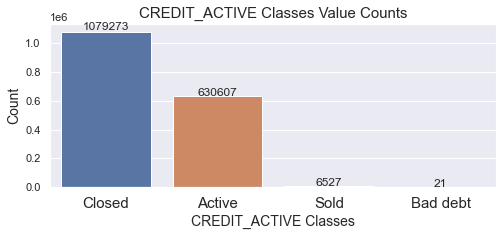

In [50]:
# visualize CREDIT_ACTIVE categories value counts
plt.figure(figsize = (8,3))

sns.set_theme(style = 'darkgrid')

g = sns.countplot(x = 'CREDIT_ACTIVE', data = bureau_df)

plt.title('CREDIT_ACTIVE Classes Value Counts', size = 15)
plt.xlabel('CREDIT_ACTIVE Classes', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 15)

# showing exact values on bars
show_values(g);

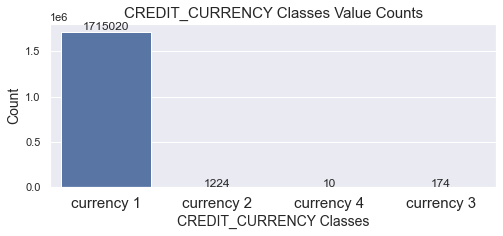

In [51]:
# visualize CREDIT_CURRENCY categories value counts
plt.figure(figsize = (8,3))

sns.set_theme(style = 'darkgrid')

g = sns.countplot(x = 'CREDIT_CURRENCY', data = bureau_df)

plt.title('CREDIT_CURRENCY Classes Value Counts', size = 15)
plt.xlabel('CREDIT_CURRENCY Classes', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 15)

# showing exact values on bars
show_values(g);

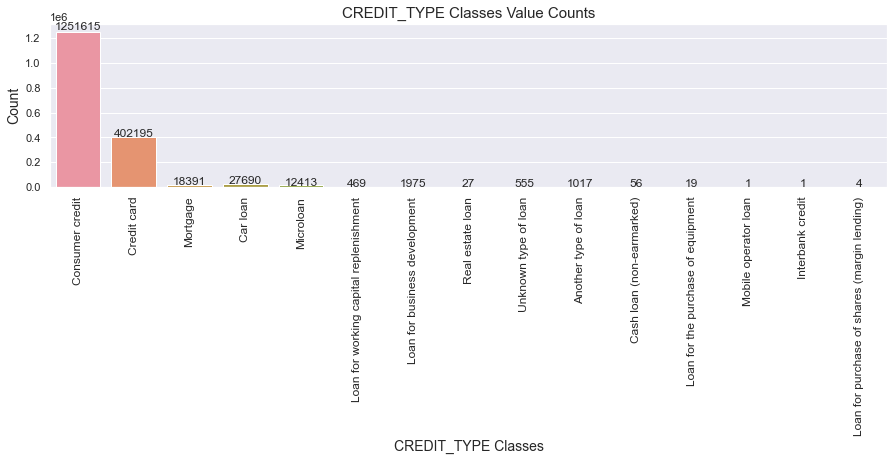

In [52]:
# visualize CREDIT_TYPE categories value counts
plt.figure(figsize = (15,3))

sns.set_theme(style = 'darkgrid')

g = sns.countplot(x = 'CREDIT_TYPE', data = bureau_df)

plt.title('CREDIT_TYPE Classes Value Counts', size = 15)
plt.xlabel('CREDIT_TYPE Classes', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 12, rotation = 90)

# showing exact values on bars
show_values(g);

In [53]:
# Detect outliers from continuous columns

# extract continuous columns
all_numerical_cols = list(bureau_df.select_dtypes(exclude='object').columns)

# continuous columns are all columns excluding target and flags columns
cont_cols = [col for col in all_numerical_cols if col!="SK_ID_CURR" and col!='SK_ID_BUREAU']
print(f'No. of continuous features = {len(cont_cols)}')

No. of continuous features = 12


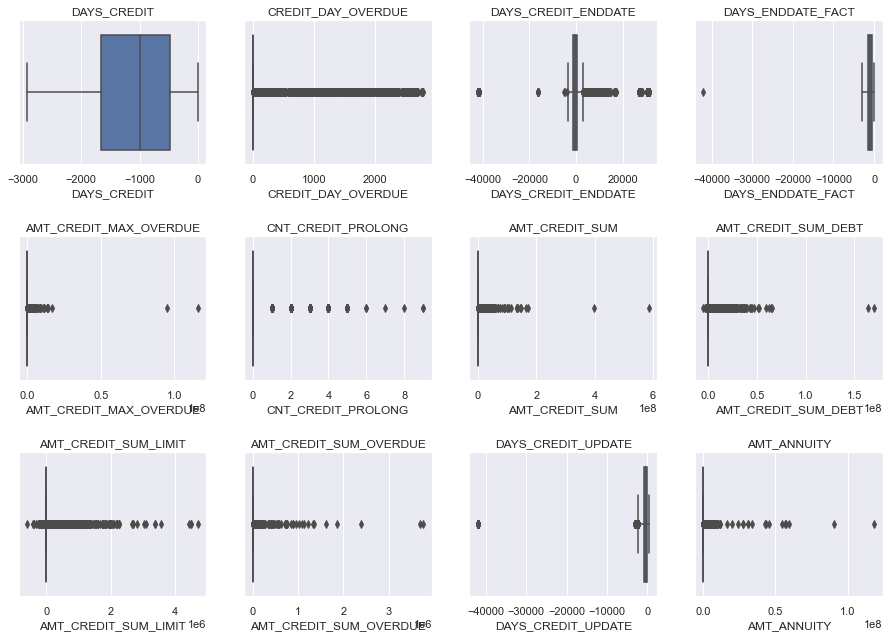

In [54]:
# draw boxplots for each continuous column
plt.figure(figsize = (15, 4))
for i, col in enumerate(cont_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data = bureau_df, x = col)
    plt.title(col)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=1, 
                    right=0.9, 
                    top=3, 
                    wspace=0.2, 
                    hspace=0.5)
plt.show()

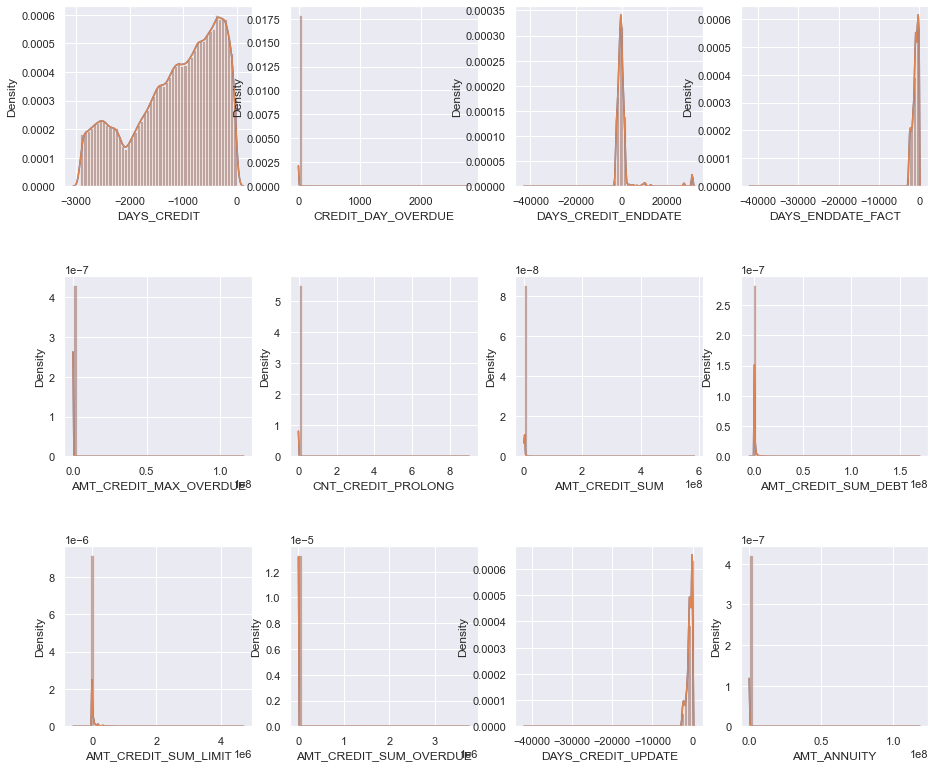

In [55]:
# Compare distribution of each continuous feature from bureau_df dataset
# create a distribution plot for each continuous feature
plt.figure(figsize = (15, 5))
for i, col in enumerate(cont_cols):
    plt.subplot(3, 4, i + 1)
    sns.distplot(bureau_df[col])
    sns.distplot(bureau_df[col])
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=1, 
                    right=0.9, 
                    top=3, 
                    wspace=0.2, 
                    hspace=0.5)
plt.show()

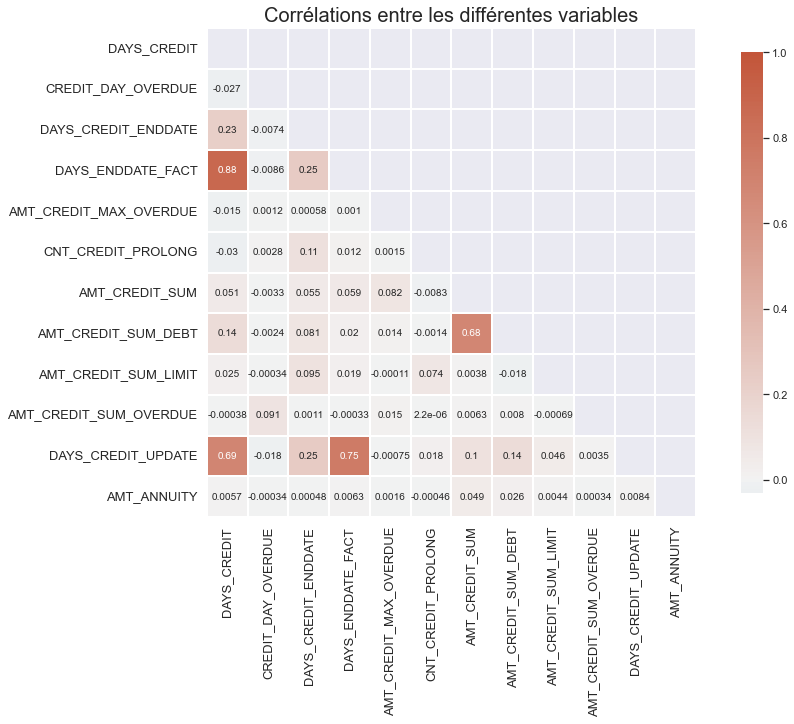

In [56]:
# compute the correlation matrix
corr = bureau_df[cont_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
colormap = sns.heatmap(corr, 
                       annot=True, 
                       annot_kws ={'size':10}, 
                       mask=mask, 
                       cmap=cmap, 
                       vmax=1, 
                       center=0,
                       square=True, 
                       linewidths=2, 
                       cbar_kws={"shrink": .9})

plt.gca().set_yticklabels(cont_cols)

plt.gca().set_xticklabels(cont_cols)

colormap.set_xticklabels(colormap.get_xmajorticklabels(), size = 13, rotation = 90)
colormap.set_yticklabels(colormap.get_ymajorticklabels(), size = 13)

plt.title('Corrélations entre les différentes variables', size = 20);

-> A few features are highly positively correlated (> 0.6) :  

    - DAYS_CREDIT_UPDATE and DAYS_CREDIT  
    - DAYS_ENDDATE_FACT and DAYS_CREDIT  
    - DAYS_CREDIT_UPDATE and DAYS_ENDDATE_FACT  
    - AMT_CREDIT_SUM and AMT_CREDIT_SUM_DEBT

## Bureau_balance dataset

In [57]:
# Load bureau_balance dataset
bureau_balance_df = pd.read_csv(bureau_balance_path, sep = ',')
bureau_balance_df

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [58]:
# Shape of bureau_balance_df
bureau_balance_df.shape

(27299925, 3)

In [59]:
# sum of all duplicated records in bureau_balance_df dataset
print('Number of duplicates in bureau_balance_df dataset:', bureau_balance_df.duplicated().sum())

Number of duplicates in bureau_balance_df dataset: 0


In [60]:
bureau_balance_df.dtypes

SK_ID_BUREAU       int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [61]:
# Missing values in bureau_balance_df
bureau_balance_df.isna().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [62]:
# go deeper with object columns and extract the unique classes in each column
## create a dataframe with object dtype columns
unique_df = pd.DataFrame(bureau_balance_df.select_dtypes('object').nunique()).reset_index()
unique_df.columns = ['Column','No. of Unique Values']

## extract the unique classes in each column
unique_df['Unique Values'] = unique_df['Column'].apply(lambda x: bureau_balance_df[x].unique())
unique_df.sort_values(by='No. of Unique Values')

,Column,No. of Unique Values,Unique Values
0,STATUS,8,"[C, 0, X, 1, 2, 3, 5, 4]"


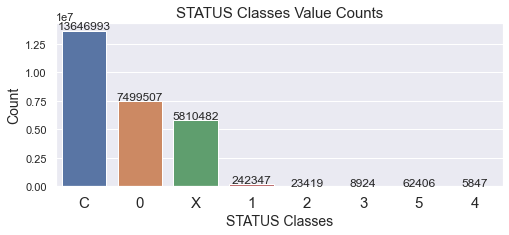

In [63]:
# visualize STATUS categories value counts
plt.figure(figsize = (8,3))

sns.set_theme(style = 'darkgrid')

g = sns.countplot(x = 'STATUS', data = bureau_balance_df)

plt.title('STATUS Classes Value Counts', size = 15)
plt.xlabel('STATUS Classes', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 15)

# showing exact values on bars
show_values(g);

## POS_CASH_balance dataset

In [64]:
# Load POS_CASH_balance dataset
POS_CASH_balance_df = pd.read_csv(POS_CASH_balance_path, sep = ',')
POS_CASH_balance_df

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


In [65]:
# Shape of POS_CASH_balance_df
POS_CASH_balance_df.shape

(10001358, 8)

In [66]:
# sum of all duplicated records in POS_CASH_balance_df dataset
print('Number of duplicates in POS_CASH_balance_df dataset:', 
      POS_CASH_balance_df.duplicated().sum())

Number of duplicates in POS_CASH_balance_df dataset: 0


In [67]:
POS_CASH_balance_df.dtypes

SK_ID_PREV                 int64
SK_ID_CURR                 int64
MONTHS_BALANCE             int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS      object
SK_DPD                     int64
SK_DPD_DEF                 int64
dtype: object

In [68]:
# Missing values in POS_CASH_balance_df
POS_CASH_balance_df.isna().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [69]:
# Missing values in POS_CASH_balance_df
POS_CASH_balance_df.isna().mean()

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
MONTHS_BALANCE           0.000000
CNT_INSTALMENT           0.002607
CNT_INSTALMENT_FUTURE    0.002608
NAME_CONTRACT_STATUS     0.000000
SK_DPD                   0.000000
SK_DPD_DEF               0.000000
dtype: float64

In [70]:
# Only columns with NaNs count and percentage in POS_CASH_balance_df dataset
columns = POS_CASH_balance_df.isnull().sum()[POS_CASH_balance_df.isnull().sum() != 0].keys()
nans_count = POS_CASH_balance_df.isnull().sum()[POS_CASH_balance_df.isnull().sum() != 0].values
nans_percentage = POS_CASH_balance_df.isnull().sum()[POS_CASH_balance_df.isnull().sum() != 0].values/POS_CASH_balance_df.shape[0]

# create a dataframe from the extracted info. 
nans_df = pd.DataFrame({'Column': columns, 'No. of NaNs': nans_count, '% of NaNs in Column':nans_percentage * 100})
nans_df = nans_df.sort_values(by = '% of NaNs in Column', ascending = False)
nans_df

,Column,No. of NaNs,% of NaNs in Column
1,CNT_INSTALMENT_FUTURE,26087,0.260835
0,CNT_INSTALMENT,26071,0.260675


In [71]:
# go deeper with object columns and extract the unique classes in each column
## create a dataframe with object dtype columns
unique_df = pd.DataFrame(POS_CASH_balance_df.select_dtypes('object').nunique()).reset_index()
unique_df.columns = ['Column','No. of Unique Values']

## extract the unique classes in each column
unique_df['Unique Values'] = unique_df['Column'].apply(lambda x: POS_CASH_balance_df[x].unique())
unique_df.sort_values(by='No. of Unique Values')

,Column,No. of Unique Values,Unique Values
0,NAME_CONTRACT_STATUS,9,"[Active, Completed, Signed, Approved, Returned to the store, Demand, Canceled, XNA, Amortized debt]"


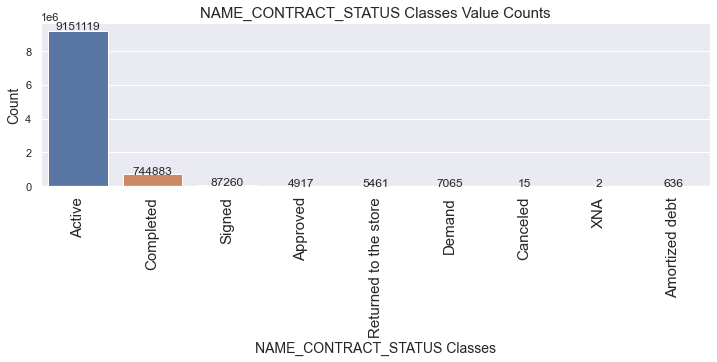

In [72]:
# visualize NAME_CONTRACT_STATUS categories value counts
plt.figure(figsize = (12,3))

sns.set_theme(style = 'darkgrid')

g = sns.countplot(x = 'NAME_CONTRACT_STATUS', data = POS_CASH_balance_df)

plt.title('NAME_CONTRACT_STATUS Classes Value Counts', size = 15)
plt.xlabel('NAME_CONTRACT_STATUS Classes', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 15, rotation = 90)

# showing exact values on bars
show_values(g);

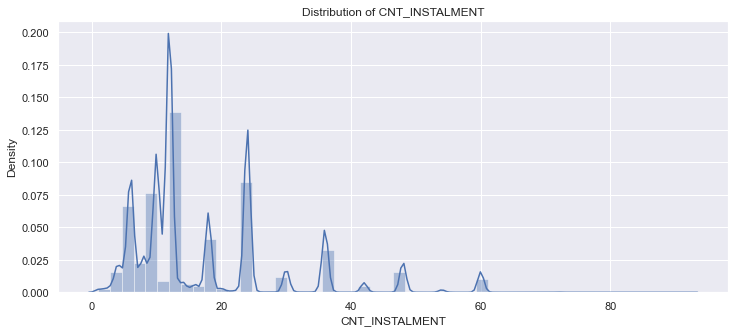

In [73]:
# Show Distribution of CNT_INSTALMENT in POS_CASH data
plt.figure(figsize=(12,5))
plt.title("Distribution of CNT_INSTALMENT")
sns.distplot(POS_CASH_balance_df.CNT_INSTALMENT.dropna())
plt.show()

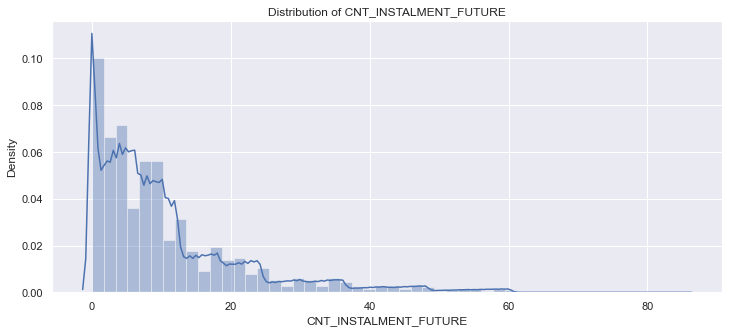

In [74]:
# Show Distribution of CNT_INSTALMENT_FUTURE in POS_CASH data
plt.figure(figsize=(12,5))
plt.title("Distribution of CNT_INSTALMENT_FUTURE")
sns.distplot(POS_CASH_balance_df.CNT_INSTALMENT_FUTURE.dropna())
plt.show()

In [75]:
POS_CASH_balance_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [77]:
# continuous columns
cont_cols = ['MONTHS_BALANCE', 'CNT_INSTALMENT',
             'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']

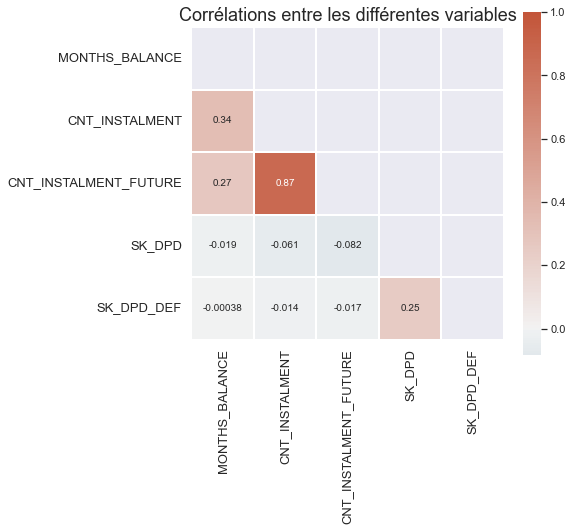

In [81]:
# compute the correlation matrix
corr = POS_CASH_balance_df[cont_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7,7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
colormap = sns.heatmap(corr, 
                       annot=True, 
                       annot_kws ={'size':10}, 
                       mask=mask, 
                       cmap=cmap, 
                       vmax=1, 
                       center=0,
                       square=True, 
                       linewidths=2, 
                       cbar_kws={"shrink": .9})

plt.gca().set_yticklabels(cont_cols)

plt.gca().set_xticklabels(cont_cols)

colormap.set_xticklabels(colormap.get_xmajorticklabels(), size = 13, rotation = 90)
colormap.set_yticklabels(colormap.get_ymajorticklabels(), size = 13)

plt.title('Corrélations entre les différentes variables', size = 18);

-> CNT_INSTALMENT and CNT_INSTALMENT_FUTURE are highly corrleated with a postive linear slope.  

-> Accunting customers NEW_CONTRACT_STATUS, active is much common than any another options.

## credit_card_balance dataset

In [82]:
# Load credit_card_balance dataset
credit_card_balance_df = pd.read_csv(credit_card_balance_path, sep = ',')
credit_card_balance_df

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.00,1800.000,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.00,2250.000,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.00,2250.000,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.00,11925.000,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.00,27000.000,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,1879.11,0.000,0.000,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,375750.00,356994.675,269356.140,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [83]:
# Shape of credit_card_balance_df
credit_card_balance_df.shape

(3840312, 23)

In [84]:
# sum of all duplicated records in credit_card_balance_df dataset
print('Number of duplicates in credit_card_balance_df dataset:', 
      credit_card_balance_df.duplicated().sum())

Number of duplicates in credit_card_balance_df dataset: 0


In [85]:
credit_card_balance_df.dtypes

SK_ID_PREV                      int64
SK_ID_CURR                      int64
MONTHS_BALANCE                  int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL         int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT            int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS           object
SK_DPD                          int64
SK_DPD_DEF                      int64
dtype: object

In [86]:
# Missing values in credit_card_balance_df
credit_card_balance_df.isna().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [87]:
# Only columns with NaNs count and percentage in credit_card_balance_df dataset
columns = credit_card_balance_df.isnull().sum()[credit_card_balance_df.isnull().sum() != 0].keys()
nans_count = credit_card_balance_df.isnull().sum()[credit_card_balance_df.isnull().sum() != 0].values
nans_percentage = credit_card_balance_df.isnull().sum()[credit_card_balance_df.isnull().sum() != 0].values/credit_card_balance_df.shape[0]

# create a dataframe from the extracted info. 
nans_df = pd.DataFrame({'Column': columns, 'No. of NaNs': nans_count, '% of NaNs in Column':nans_percentage * 100})
nans_df = nans_df.sort_values(by = '% of NaNs in Column', ascending = False)
nans_df

,Column,No. of NaNs,% of NaNs in Column
4,AMT_PAYMENT_CURRENT,767988,19.998063
0,AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
1,AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
2,AMT_DRAWINGS_POS_CURRENT,749816,19.524872
5,CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
6,CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
7,CNT_DRAWINGS_POS_CURRENT,749816,19.524872
3,AMT_INST_MIN_REGULARITY,305236,7.948208
8,CNT_INSTALMENT_MATURE_CUM,305236,7.948208


In [88]:
# all columns dtypes
credit_card_balance_df.dtypes.value_counts()

float64    15
int64       7
object      1
dtype: int64

In [89]:
# go deeper with object columns and extract the unique classes in each column
## create a dataframe with object dtype columns
unique_df = pd.DataFrame(credit_card_balance_df.select_dtypes('object').nunique()).reset_index()
unique_df.columns = ['Column','No. of Unique Values']

## extract the unique classes in each column
unique_df['Unique Values'] = unique_df['Column'].apply(lambda x: credit_card_balance_df[x].unique())
unique_df.sort_values(by='No. of Unique Values')

,Column,No. of Unique Values,Unique Values
0,NAME_CONTRACT_STATUS,7,"[Active, Completed, Demand, Signed, Sent proposal, Refused, Approved]"


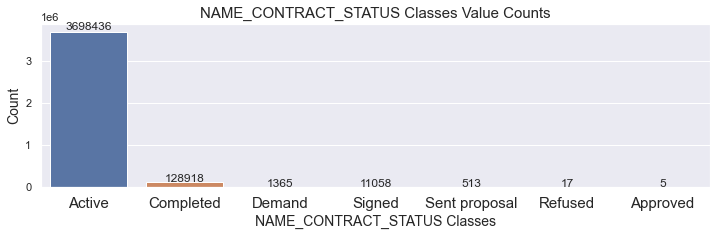

In [91]:
# visualize NAME_CONTRACT_STATUS categories value counts
plt.figure(figsize = (12,3))

sns.set_theme(style = 'darkgrid')

g = sns.countplot(x = 'NAME_CONTRACT_STATUS', data = credit_card_balance_df)

plt.title('NAME_CONTRACT_STATUS Classes Value Counts', size = 15)
plt.xlabel('NAME_CONTRACT_STATUS Classes', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 15)

# showing exact values on bars
show_values(g);

In [92]:
credit_card_balance_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [93]:
# continuous columns
cont_cols = ['MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD',
       'SK_DPD_DEF']

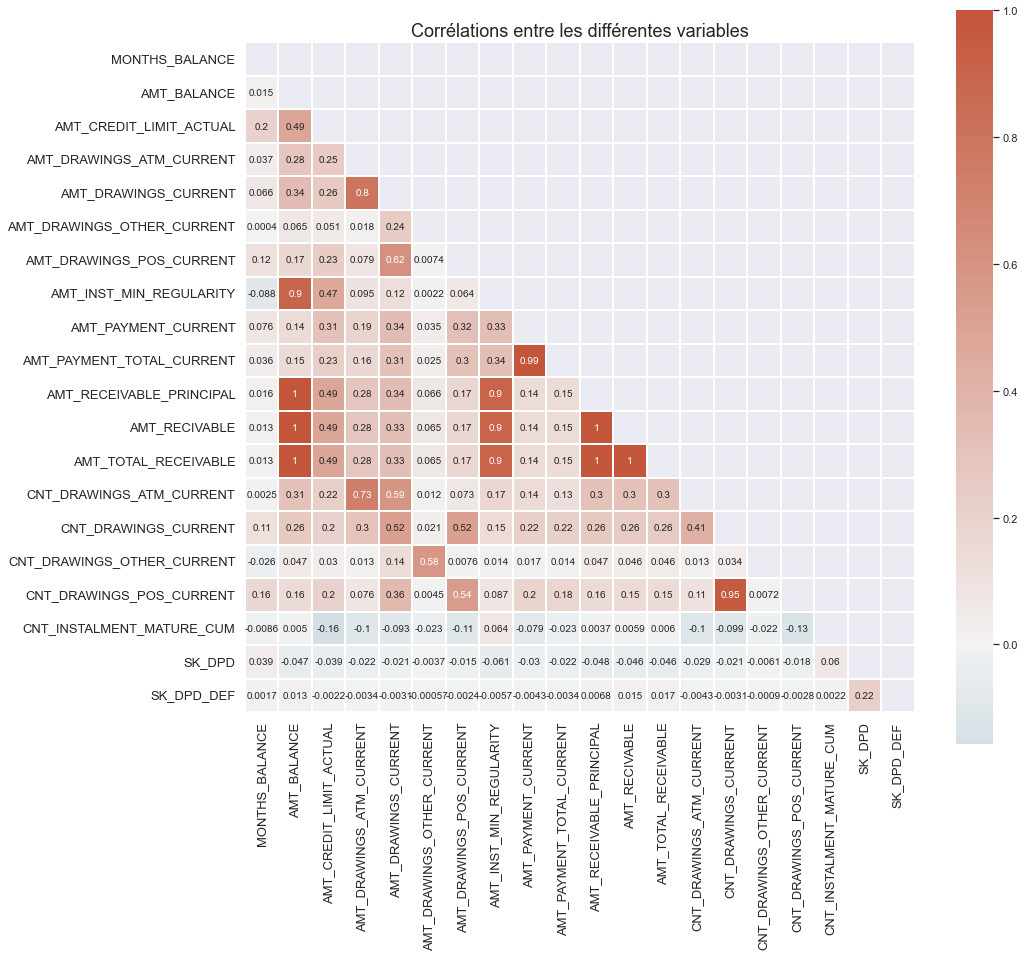

In [95]:
# compute the correlation matrix
corr = credit_card_balance_df[cont_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
colormap = sns.heatmap(corr, 
                       annot=True, 
                       annot_kws ={'size':10}, 
                       mask=mask, 
                       cmap=cmap, 
                       vmax=1, 
                       center=0,
                       square=True, 
                       linewidths=2, 
                       cbar_kws={"shrink": .9})

plt.gca().set_yticklabels(cont_cols)

plt.gca().set_xticklabels(cont_cols)

colormap.set_xticklabels(colormap.get_xmajorticklabels(), size = 13, rotation = 90)
colormap.set_yticklabels(colormap.get_ymajorticklabels(), size = 13)

plt.title('Corrélations entre les différentes variables', size = 18);

## previous_application dataset

In [96]:
# Load previous_application dataset
previous_application_df = pd.read_csv(previous_application_path, sep = ',')
previous_application_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [97]:
# Shape of previous_application_df
previous_application_df.shape

(1670214, 37)

In [98]:
# sum of all duplicated records in previous_application_df dataset
print('Number of duplicates in previous_application_df dataset:', 
      previous_application_df.duplicated().sum())

Number of duplicates in previous_application_df dataset: 0


In [99]:
previous_application_df.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [100]:
# all columns dtypes
previous_application_df.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

In [101]:
# go deeper with object columns and extract the unique classes in each column
## create a dataframe with object dtype columns
unique_df = pd.DataFrame(previous_application_df.select_dtypes('object').nunique()).reset_index()
unique_df.columns = ['Column','No. of Unique Values']

## extract the unique classes in each column
unique_df['Unique Values'] = unique_df['Column'].apply(lambda x: previous_application_df[x].unique())
unique_df.sort_values(by='No. of Unique Values')

,Column,No. of Unique Values,Unique Values
2,FLAG_LAST_APPL_PER_CONTRACT,2,"[Y, N]"
11,NAME_PRODUCT_TYPE,3,"[XNA, x-sell, walk-in]"
0,NAME_CONTRACT_TYPE,4,"[Consumer loans, Cash loans, Revolving loans, XNA]"
4,NAME_CONTRACT_STATUS,4,"[Approved, Refused, Canceled, Unused offer]"
5,NAME_PAYMENT_TYPE,4,"[Cash through the bank, XNA, Non-cash from your account, Cashless from the account of the employer]"
8,NAME_CLIENT_TYPE,4,"[Repeater, New, Refreshed, XNA]"
10,NAME_PORTFOLIO,5,"[POS, Cash, XNA, Cards, Cars]"
14,NAME_YIELD_GROUP,5,"[middle, low_action, high, low_normal, XNA]"
1,WEEKDAY_APPR_PROCESS_START,7,"[SATURDAY, THURSDAY, TUESDAY, MONDAY, FRIDAY, SUNDAY, WEDNESDAY]"
7,NAME_TYPE_SUITE,7,"[nan, Unaccompanied, Spouse, partner, Family, Children, Other_B, Other_A, Group of people]"


In [102]:
# Missing values in previous_application_df
previous_application_df.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [103]:
# Only columns with NaNs count and percentage in previous_application_df dataset
columns = previous_application_df.isnull().sum()[previous_application_df.isnull().sum() != 0].keys()
nans_count = previous_application_df.isnull().sum()[previous_application_df.isnull().sum() != 0].values
nans_percentage = previous_application_df.isnull().sum()[previous_application_df.isnull().sum() != 0].values/previous_application_df.shape[0]

# create a dataframe from the extracted info. 
nans_df = pd.DataFrame({'Column': columns, 'No. of NaNs': nans_count, '% of NaNs in Column':nans_percentage * 100})
nans_df = nans_df.sort_values(by = '% of NaNs in Column', ascending = False)
nans_df

,Column,No. of NaNs,% of NaNs in Column
5,RATE_INTEREST_PRIMARY,1664263,99.643698
6,RATE_INTEREST_PRIVILEGED,1664263,99.643698
2,AMT_DOWN_PAYMENT,895844,53.636480
4,RATE_DOWN_PAYMENT,895844,53.636480
7,NAME_TYPE_SUITE,820405,49.119754
10,DAYS_FIRST_DRAWING,673065,40.298129
11,DAYS_FIRST_DUE,673065,40.298129
12,DAYS_LAST_DUE_1ST_VERSION,673065,40.298129
13,DAYS_LAST_DUE,673065,40.298129
14,DAYS_TERMINATION,673065,40.298129


In [110]:
# List of categorical features
cat_col = previous_application_df.select_dtypes('object').columns.tolist()
cat_col

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

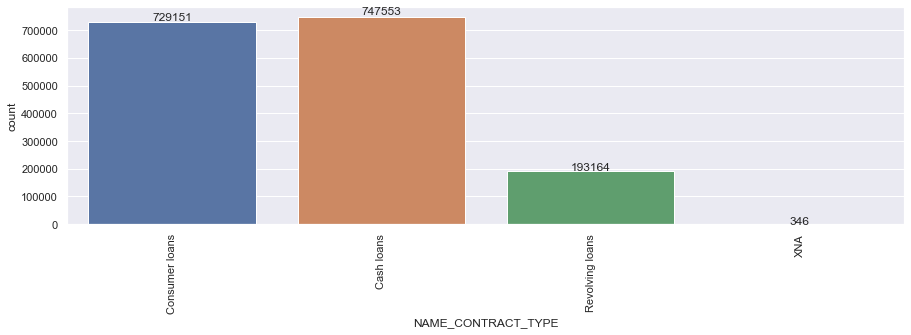

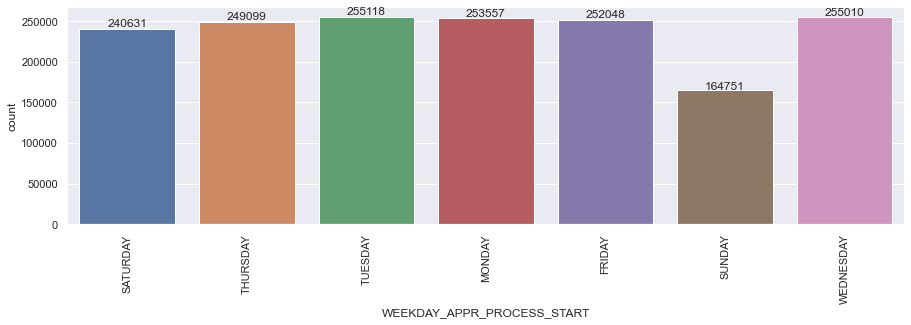

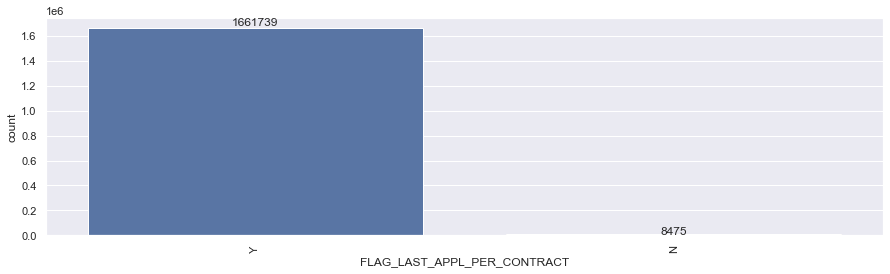

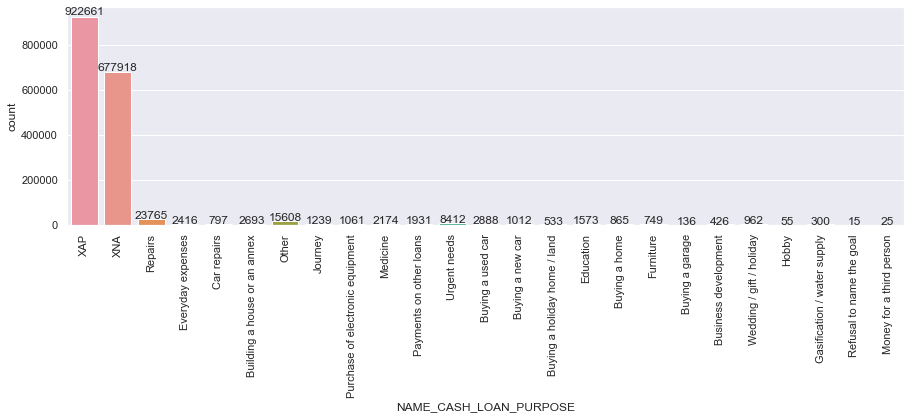

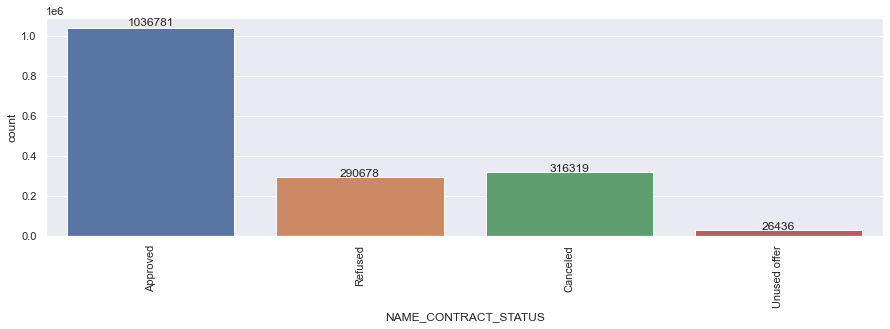

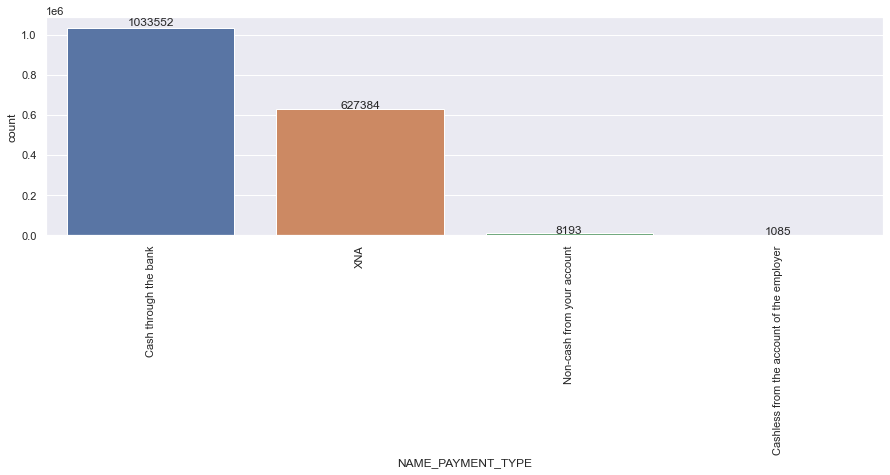

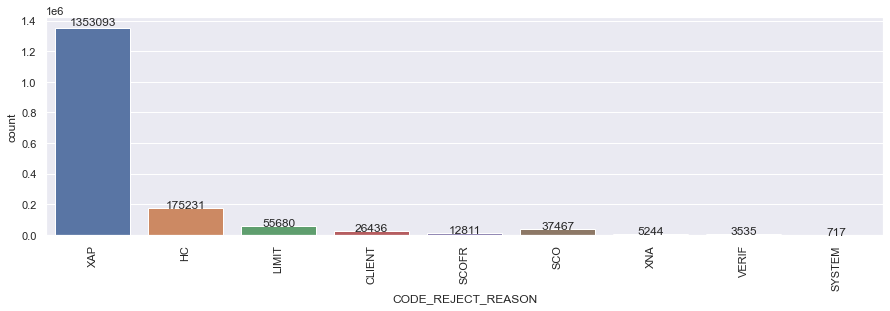

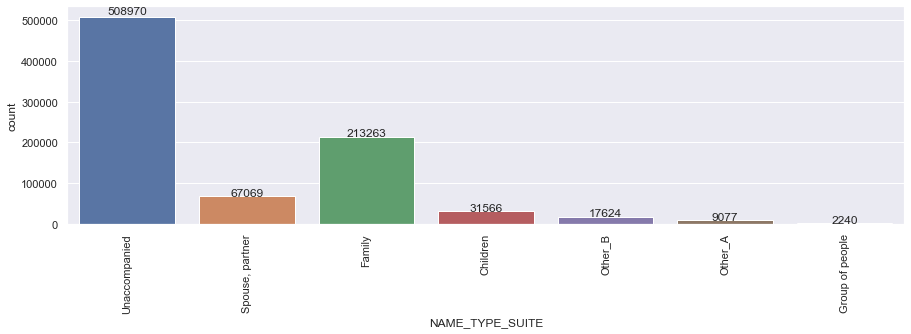

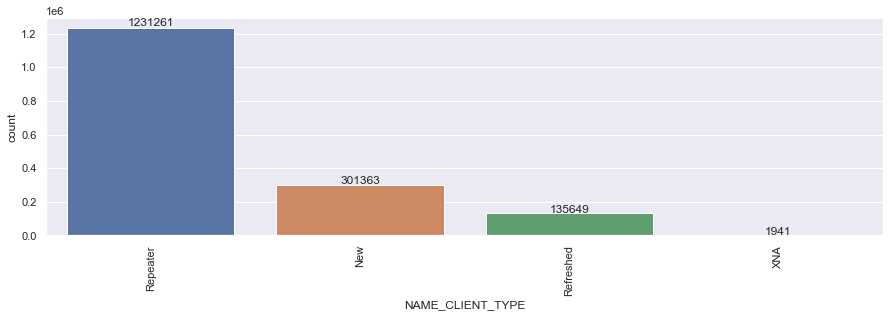

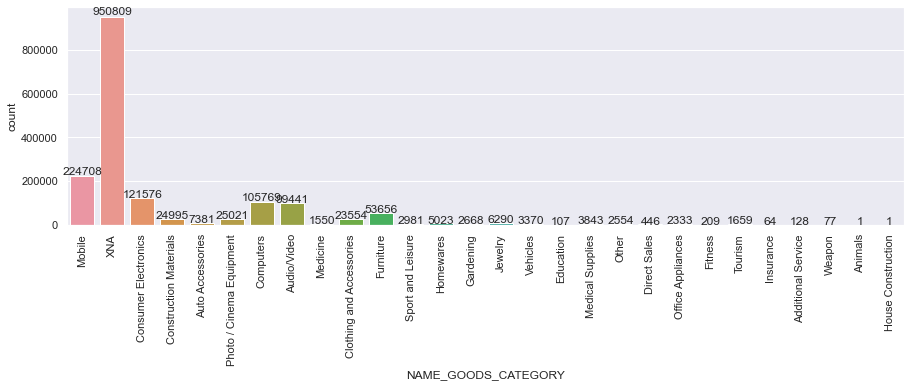

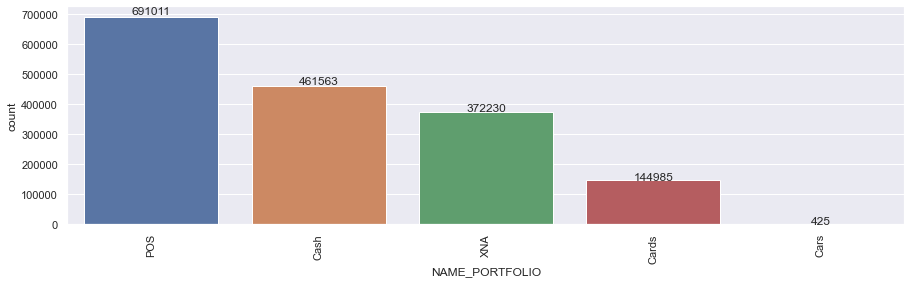

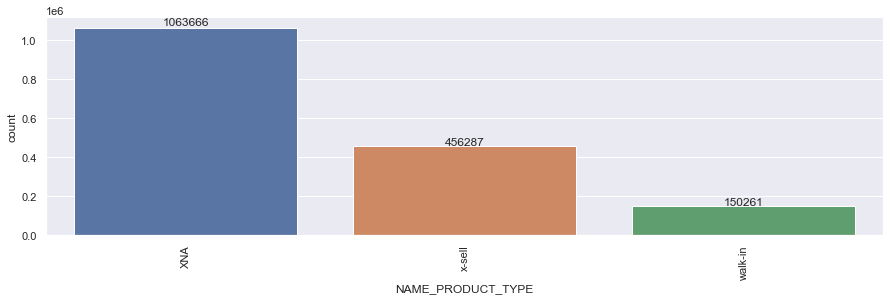

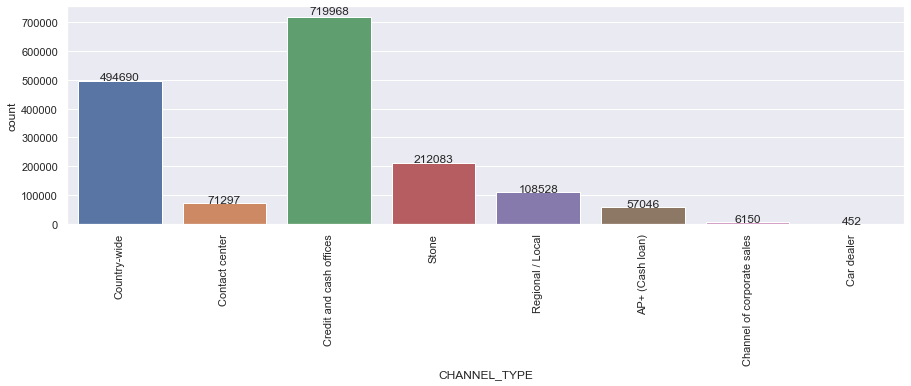

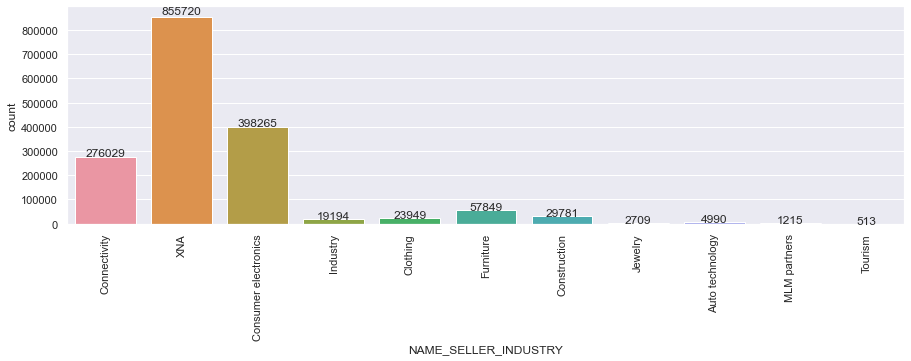

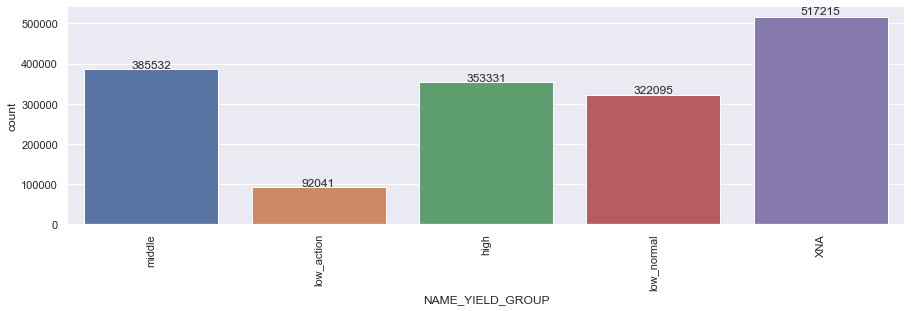

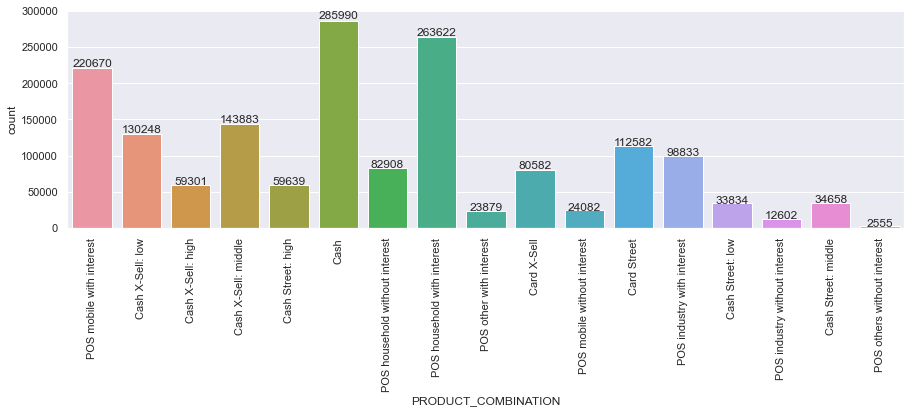

In [125]:
# Countplot shows the counts of observations in each categorical columns in previous application data
graph_objects(previous_application_df)

In [127]:
# extract continuous columns
all_numerical_cols = list(previous_application_df.select_dtypes(exclude='object').columns)

# continuous columns are all columns excluding target and flags columns
cont_cols = [col for col in all_numerical_cols if col!="SK_ID_CURR" and col!='SK_ID_PREV']
print(f'No. of continuous features = {len(cont_cols)}')

No. of continuous features = 19


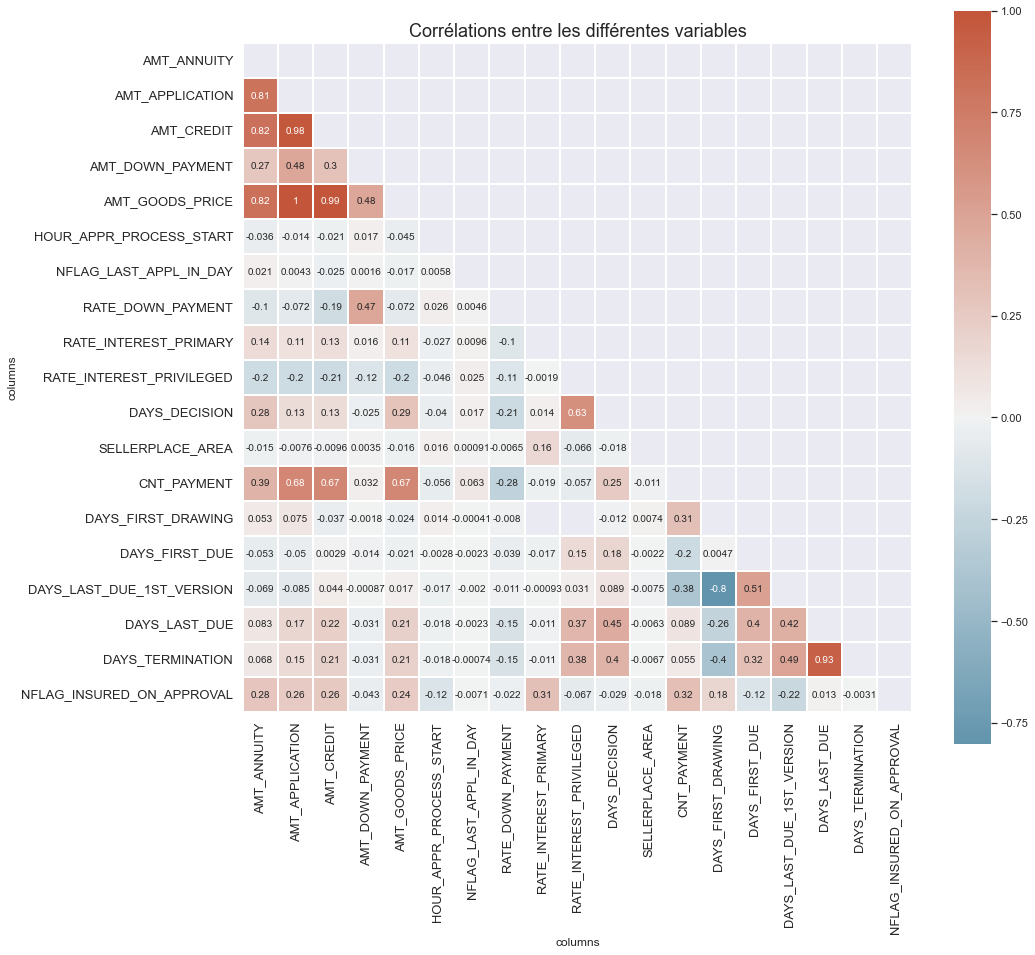

In [129]:
# compute the correlation matrix
corr = previous_application_df[cont_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
colormap = sns.heatmap(corr, 
                       annot=True, 
                       annot_kws ={'size':10}, 
                       mask=mask, 
                       cmap=cmap, 
                       vmax=1, 
                       center=0,
                       square=True, 
                       linewidths=2, 
                       cbar_kws={"shrink": .9})

plt.gca().set_yticklabels(cont_cols)

plt.gca().set_xticklabels(cont_cols)

colormap.set_xticklabels(colormap.get_xmajorticklabels(), size = 13, rotation = 90)
colormap.set_yticklabels(colormap.get_ymajorticklabels(), size = 13)

plt.title('Corrélations entre les différentes variables', size = 18);

## installments_payments dataset

In [130]:
# Load installments_payments dataset
installments_payments_df = pd.read_csv(installments_payments_path, sep = ',')
installments_payments_df

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [131]:
# Shape of installments_payments_df
installments_payments_df.shape

(13605401, 8)

In [132]:
# sum of all duplicated records in installments_payments_df dataset
print('Number of duplicates in installments_payments_df dataset:', 
      installments_payments_df.duplicated().sum())

Number of duplicates in installments_payments_df dataset: 0


In [133]:
installments_payments_df.dtypes

SK_ID_PREV                  int64
SK_ID_CURR                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER       int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtype: object

In [134]:
# Missing values in installments_payments_df
installments_payments_df.isna().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [135]:
# Missing values in installments_payments_df
installments_payments_df.isna().mean()

SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NUM_INSTALMENT_VERSION    0.000000
NUM_INSTALMENT_NUMBER     0.000000
DAYS_INSTALMENT           0.000000
DAYS_ENTRY_PAYMENT        0.000214
AMT_INSTALMENT            0.000000
AMT_PAYMENT               0.000214
dtype: float64

In [137]:
# Detect outliers from continuous columns

# extract continuous columns
all_numerical_cols = list(installments_payments_df.select_dtypes(exclude='object').columns)

# continuous columns are all columns excluding target and flags columns
cont_cols = [col for col in all_numerical_cols if col!="SK_ID_CURR" and col!='SK_ID_PREV']
print(f'No. of continuous features = {len(cont_cols)}')

No. of continuous features = 6


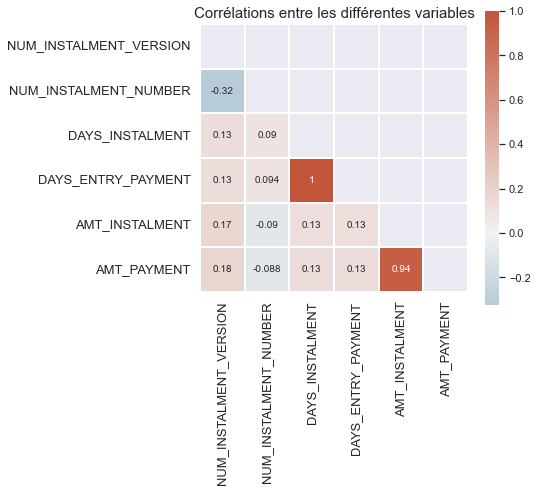

In [142]:
# compute the correlation matrix
corr = installments_payments_df[cont_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6,6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
colormap = sns.heatmap(corr, 
                       annot=True, 
                       annot_kws ={'size':10}, 
                       mask=mask, 
                       cmap=cmap, 
                       vmax=1, 
                       center=0,
                       square=True, 
                       linewidths=2, 
                       cbar_kws={"shrink": .9})

plt.gca().set_yticklabels(cont_cols)

plt.gca().set_xticklabels(cont_cols)

colormap.set_xticklabels(colormap.get_xmajorticklabels(), size = 13, rotation = 90)
colormap.set_yticklabels(colormap.get_ymajorticklabels(), size = 13)

plt.title('Corrélations entre les différentes variables', size = 15);